# продемонстрирую подход на одном из файлов

In [2]:
# импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
from sklearn.impute import KNNImputer

import vitaldb

In [7]:
a = vitaldb.VitalFile('https://physionet.org/files/vitaldb/1.0.0/vital_files/0002.vital?download')
a_p = a.to_pandas(a.get_track_names(), interval = 10)
a_p

EVENT Primus/CO2 Primus/AWP BIS/EEG1_WAV BIS/EEG2_WAV  \
0      Case started        NaN        NaN          NaN          NaN   
1               NaN        0.5        0.1         20.5    27.200001   
2               NaN        0.5        0.1        20.35    27.549999   
3               NaN        0.5        0.1    20.299999         27.0   
4               NaN        0.5        0.1    27.299999    29.299999   
...             ...        ...        ...          ...          ...   
1570            NaN        0.2        0.1    20.799999         27.6   
1571            NaN        0.2        0.1    20.299999    27.799999   
1572            NaN        0.2        0.1         20.6        27.85   
1573            NaN        0.2        0.1         21.5         28.1   
1574  Case finished        NaN        NaN          NaN          NaN   

     SNUADC/ECG_II SNUADC/ECG_V5 SNUADC/PLETH BIS/BIS BIS/SQI  ...  \
0              NaN           NaN          NaN     0.0     0.0  ...   
1         0.227889      -0.02885    51.378738     0.0     0.0  ...   
2         0.237764     -0.729944    29.654694     0.0     0.0  ...   
3         1.126475      0.030398    24.914886     0.0     0.0  ...   
4         0.356258      0.227889    41.504166     0.0     0.0  ...   
...            ...           ...          ...     ...     ...  ...   
1570      0.227889      -0.26584     8.325623     0.0     0.0  ...   
1571       0.31676     -0.354711     6.350708     0.0     0.0  ...   
1572      0.168642     -0.216466    10.695511     0.0     0.0  ...   
1573     -0.058474      0.030398      11.0905     0.0     0.0  ...   
1574      0.306886     -0.344836     6.350708     NaN     NaN  ...   

     Primus/SET_INSP_PAUSE Solar8000/VENT_INSP_TM Solar8000/VENT_SET_TV  \
0                      NaN                    NaN                   NaN   
1                      NaN                    NaN                   NaN   
2                      NaN                    NaN                   NaN   
3                      NaN                    NaN                   NaN   
4                      NaN                    NaN                   NaN   
...                    ...                    ...                   ...   
1570                   NaN                    NaN                   NaN   
1571                   NaN                    NaN                   NaN   
1572                   NaN                    NaN                   NaN   
1573                   NaN                    NaN                   NaN   
1574                   NaN                    NaN                   NaN   

     Solar8000/VENT_SET_PCP Solar8000/VENT_SET_FIO2 Solar8000/RR_CO2  \
0                       NaN                     NaN              NaN   
1                       NaN                     NaN              NaN   
2                       NaN                     NaN              NaN   
3                       NaN                     NaN              NaN   
4                       NaN                     NaN              NaN   
...                     ...                     ...              ...   
1570                    NaN                     NaN              NaN   
1571                    NaN                     NaN              NaN   
1572                    NaN                     NaN              NaN   
1573                    NaN                     NaN              NaN   
1574                    NaN                     NaN              NaN   

     Solar8000/BT Solar8000/GAS2_AGENT Solar8000/GAS2_EXPIRED  \
0             NaN                  NaN                    NaN   
1             NaN                  NaN                    NaN   
2             NaN                  NaN                    NaN   
3             NaN                  NaN                    NaN   
4             NaN                  NaN                    NaN   
...           ...                  ...                    ...   
1570         20.1                  NaN                    NaN   
1571         20.1                 

In [4]:
# памяти запустить анализ не хватило
# profile = ProfileReport(a_p, title="Profiling Report")
# profile

In [8]:
# отделение текстовых строк от числовых
p = (a_p.map(type) == str).sum()
strs = []
nums = []

for i in p.index:
    if p[i] !=0:
        strs.append(i)
    else:
        nums.append(i)

In [9]:
# поиск выбросов, на основе среднего арифметического и двух станндартных отклонений
for i in nums:
    up_outliers = a_p[i].rolling(10).mean() + 2*a_p[i].rolling(10).std()
    low_outliers = a_p[i].rolling(10).mean() - 2*a_p[i].rolling(10).std()
    a_p.loc[a_p[i] > up_outliers, i] = np.nan
    a_p.loc[a_p[i] < low_outliers, i] = np.nan

In [24]:
# очистка данных от шума средним арифметическим
df = pd.DataFrame()
df[strs] = a_p[strs]

for i in nums:
    df[i] = a_p[i].rolling(10).mean()

df

EVENT Solar8000/GAS2_AGENT  Primus/CO2  Primus/AWP  \
0      Case started                  NaN         NaN         NaN   
1               NaN                  NaN         NaN         NaN   
2               NaN                  NaN         NaN         NaN   
3               NaN                  NaN         NaN         NaN   
4               NaN                  NaN         NaN         NaN   
...             ...                  ...         ...         ...   
1570            NaN                  NaN         0.2         0.1   
1571            NaN                  NaN         0.2         0.1   
1572            NaN                  NaN         0.2         0.1   
1573            NaN                  NaN         0.2         0.1   
1574  Case finished                  NaN         NaN         NaN   

      BIS/EEG1_WAV  BIS/EEG2_WAV  SNUADC/ECG_II  SNUADC/ECG_V5  SNUADC/PLETH  \
0              NaN           NaN            NaN            NaN           NaN   
1              NaN           NaN            NaN            NaN           NaN   
2              NaN           NaN            NaN            NaN           NaN   
3              NaN           NaN            NaN            NaN           NaN   
4              NaN           NaN            NaN            NaN           NaN   
...            ...           ...            ...            ...           ...   
1570           NaN        27.810            NaN      -0.352736           NaN   
1571           NaN        27.780            NaN      -0.342861      2.479872   
1572           NaN        27.770            NaN      -0.345823      4.415288   
1573           NaN        27.785            NaN            NaN      6.034718   
1574           NaN           NaN            NaN            NaN      6.153214   

      BIS/BIS  ...  Primus/SET_PIP  Primus/SET_INSP_PAUSE  \
0         NaN  ...             NaN                    NaN   
1         NaN  ...             NaN                    NaN   
2         NaN  ...             NaN                    NaN   
3         NaN  ...             NaN                    NaN   
4         NaN  ...             NaN                    NaN   
...       ...  ...             ...                    ...   
1570      0.0  ...             NaN                    NaN   
1571      0.0  ...             NaN                    NaN   
1572      0.0  ...             NaN                    NaN   
1573      0.0  ...             NaN                    NaN   
1574      NaN  ...             NaN                    NaN   

      Solar8000/VENT_INSP_TM  Solar8000/VENT_SET_TV  Solar8000/VENT_SET_PCP  \
0                        NaN                    NaN                     NaN   
1                        NaN                    NaN                     NaN   
2                        NaN                    NaN                     NaN   
3                        NaN                    NaN                     NaN   
4                        NaN                    NaN                     NaN   
...                      ...                    ...                     ...   
1570                     NaN                    NaN                     NaN   
1571                     NaN                    NaN                     NaN   
1572                     NaN                    NaN                     NaN   
1573                     NaN                    NaN                     NaN   
1574                     NaN                    NaN                     NaN   

      Solar8000/VENT_SET_FIO2  Solar8000/RR_CO2  Solar8000/BT  \
0                         NaN               NaN           NaN   
1                         NaN               NaN           NaN   
2                         NaN               NaN           NaN   
3                         NaN               NaN           NaN   
4                         NaN               NaN           NaN   
...                       ...               ...           ...   
1570                      NaN               NaN          20.1   
1571                      NaN     

In [26]:
# заполнение пропусков методом k-ближайших соседей
knn_imputer = KNNImputer(n_neighbors = 2, weights = 'uniform')
df[nums] = pd.DataFrame(knn_imputer.fit_transform(df[nums]), columns = nums)
df[nums].isna().sum().sum()

0

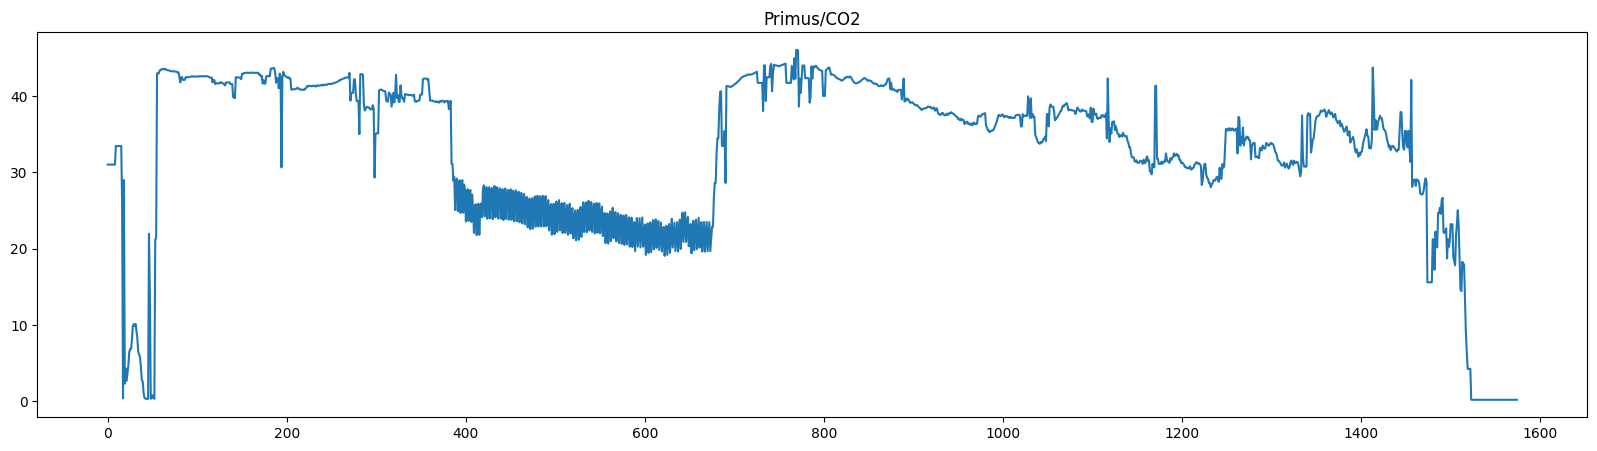

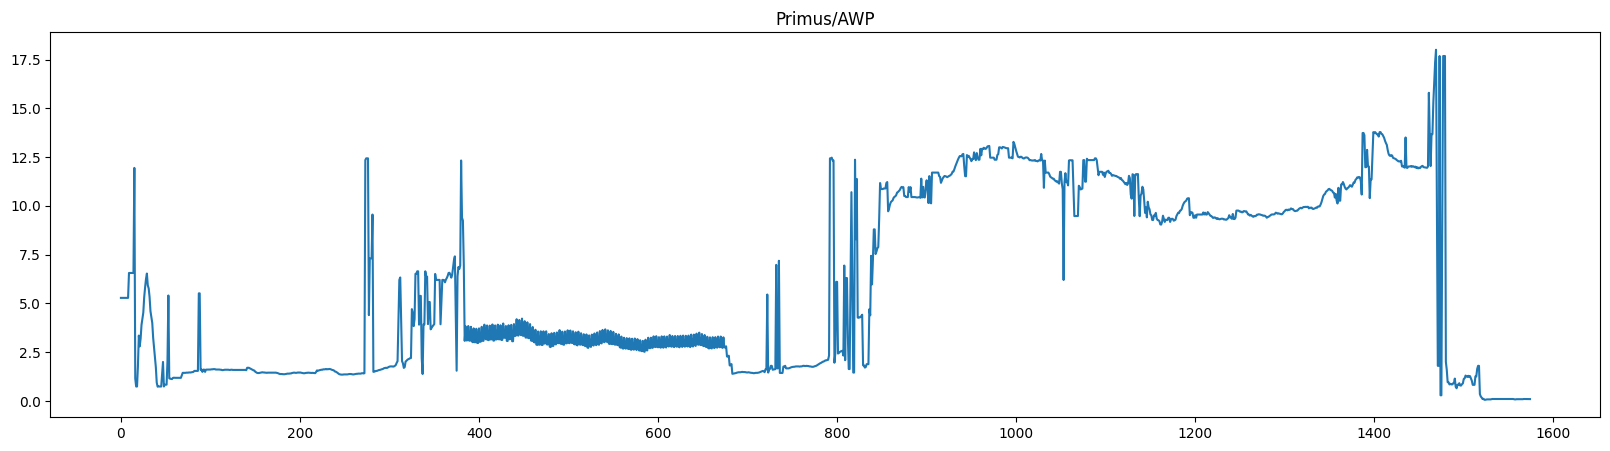

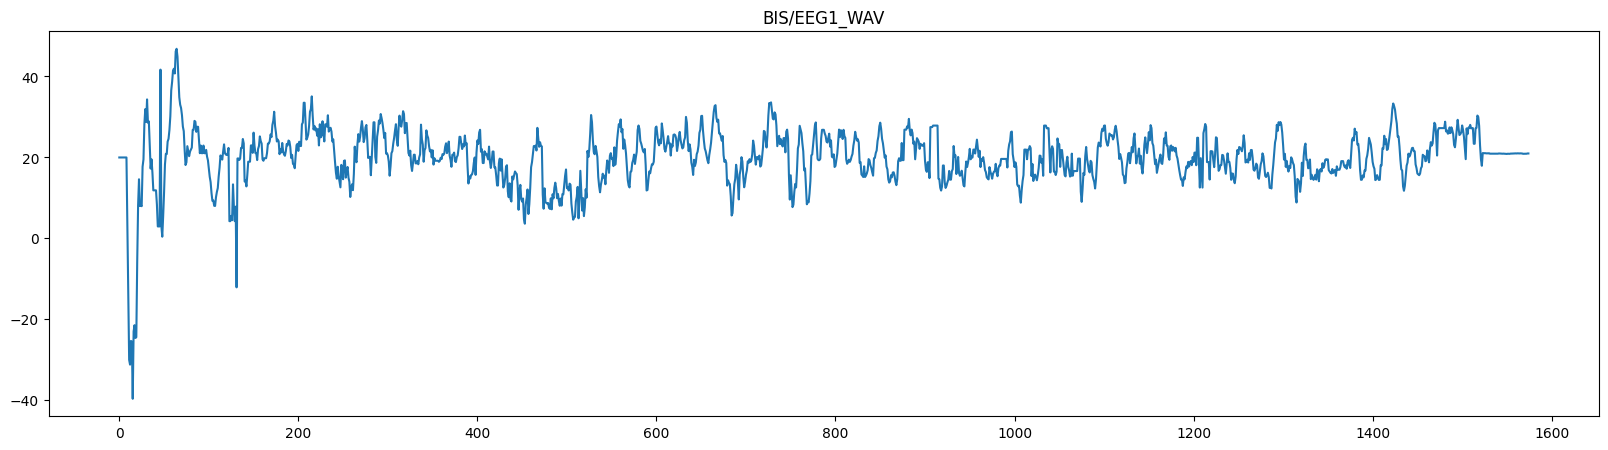

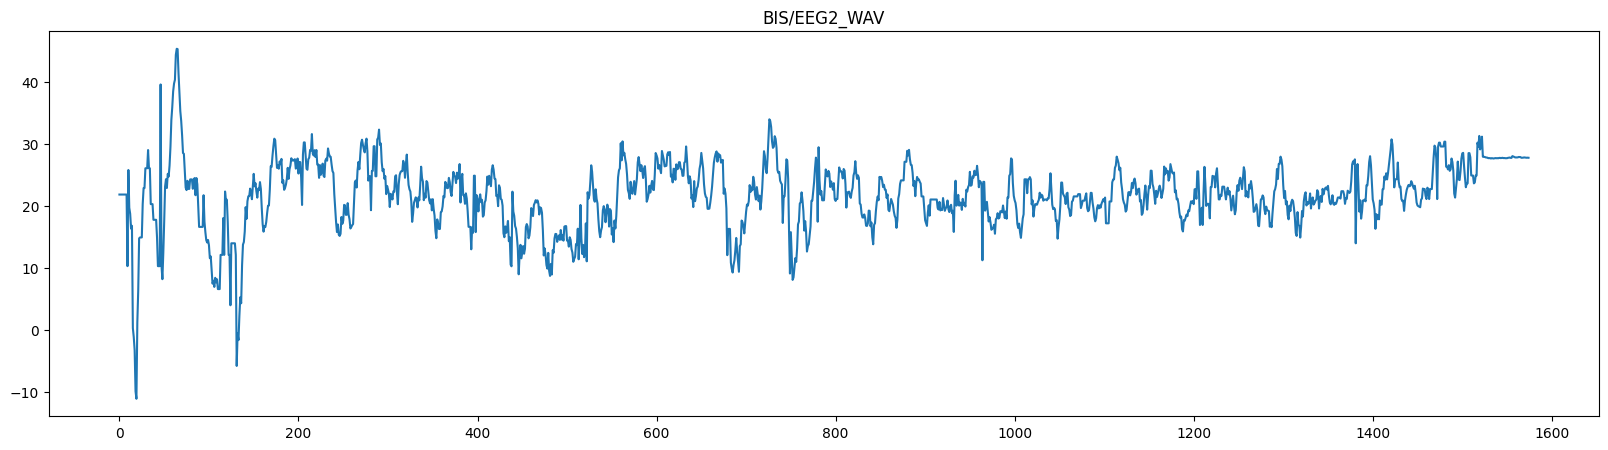

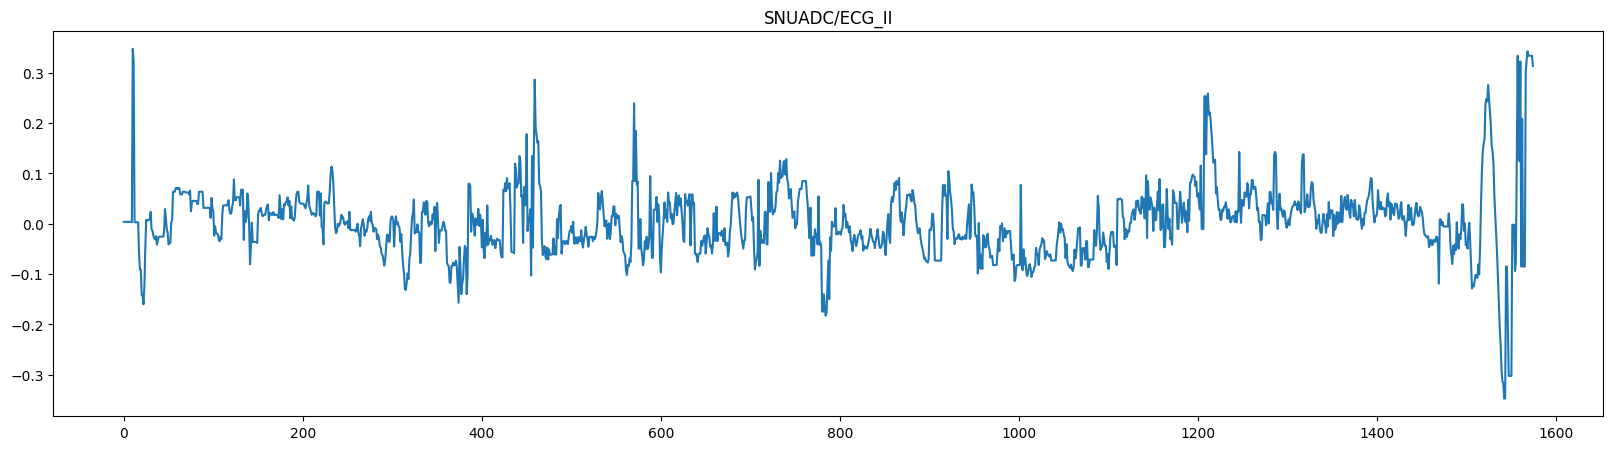

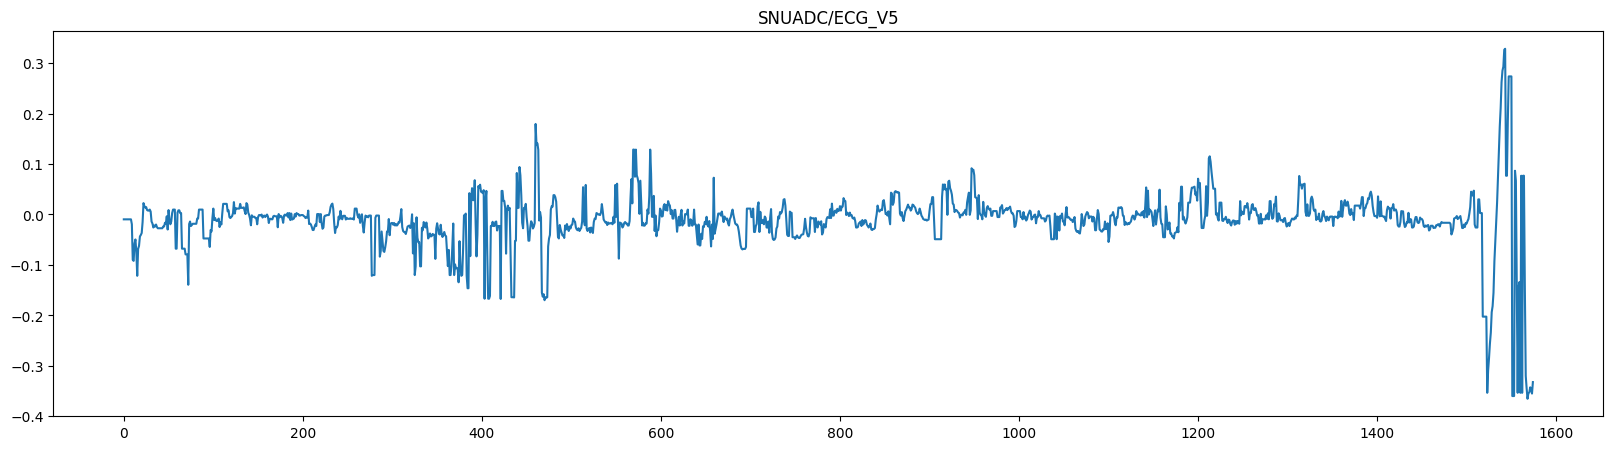

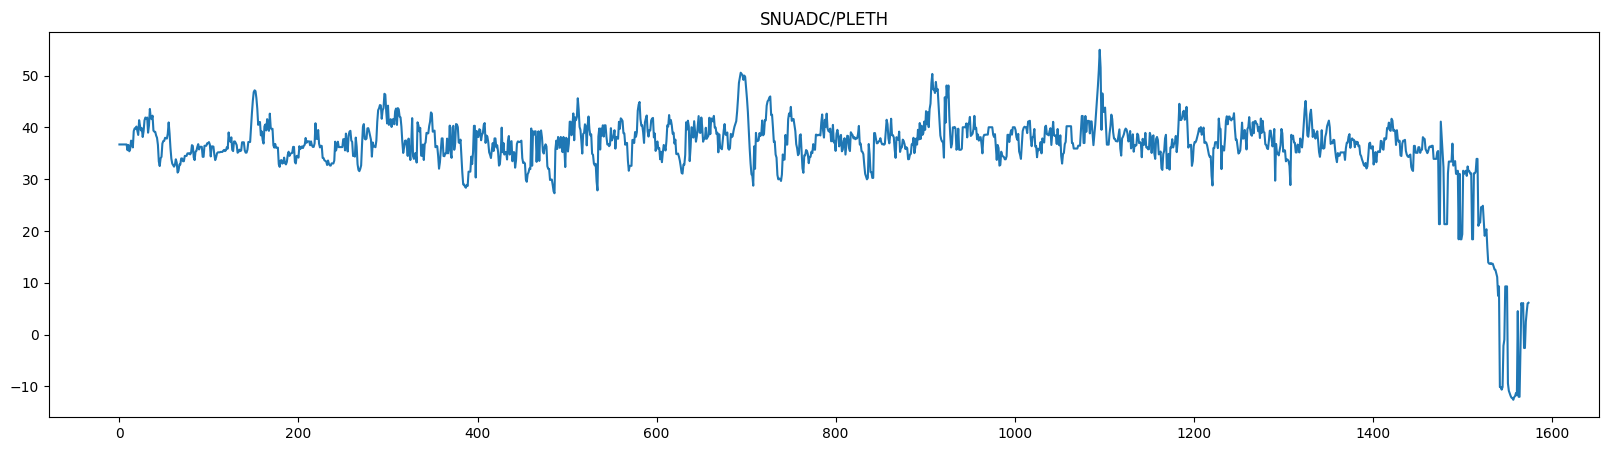

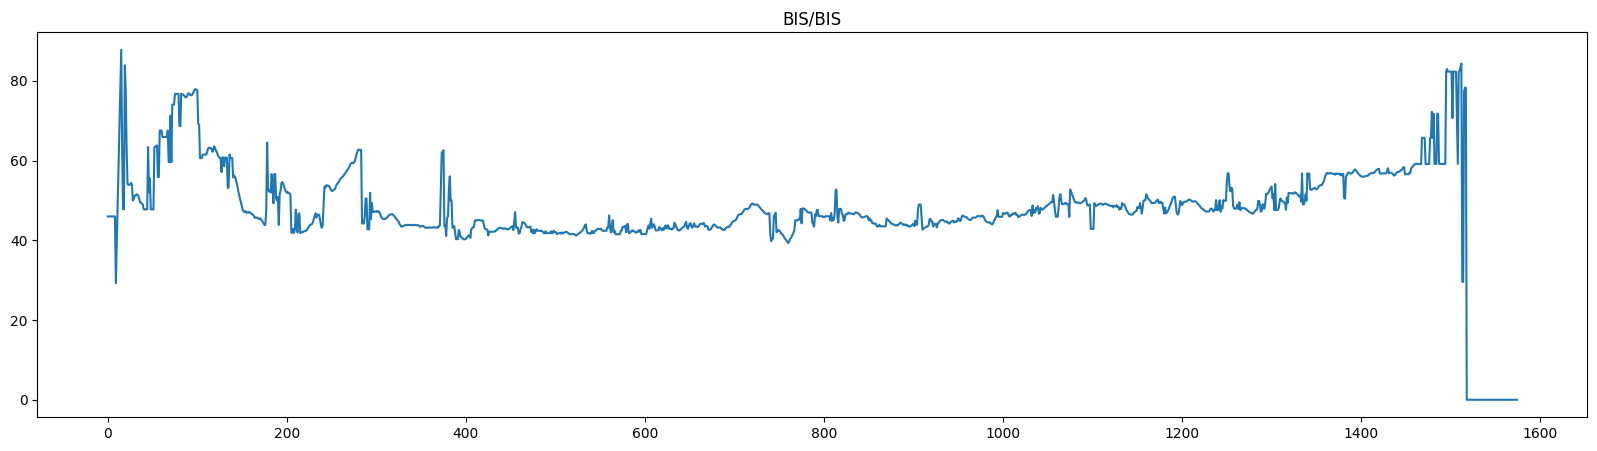

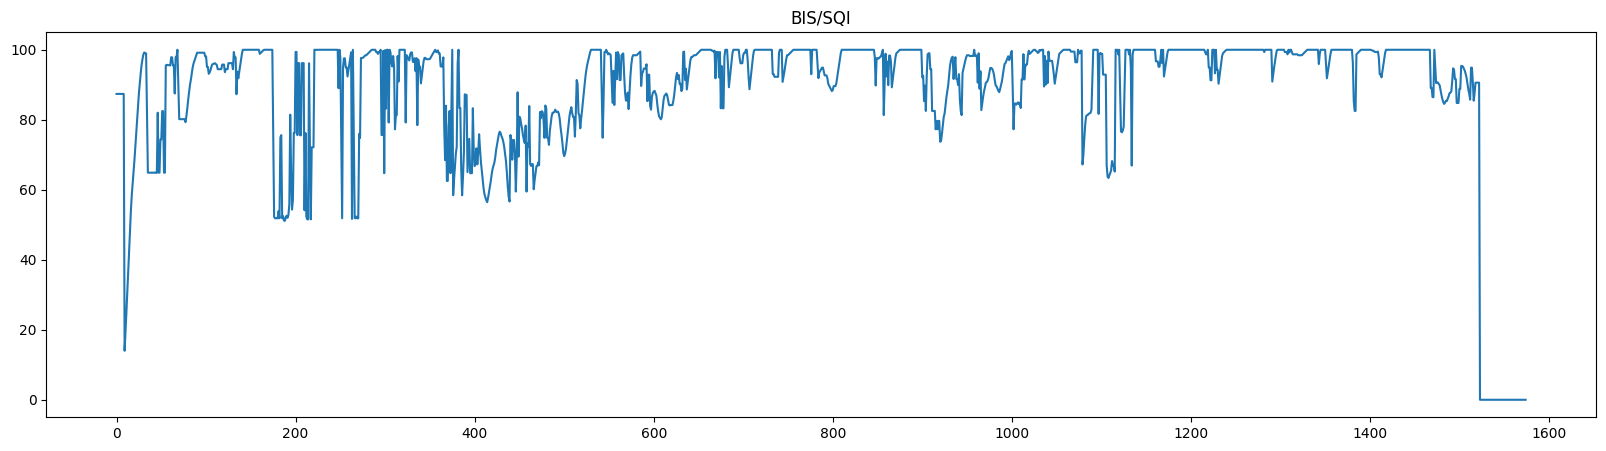

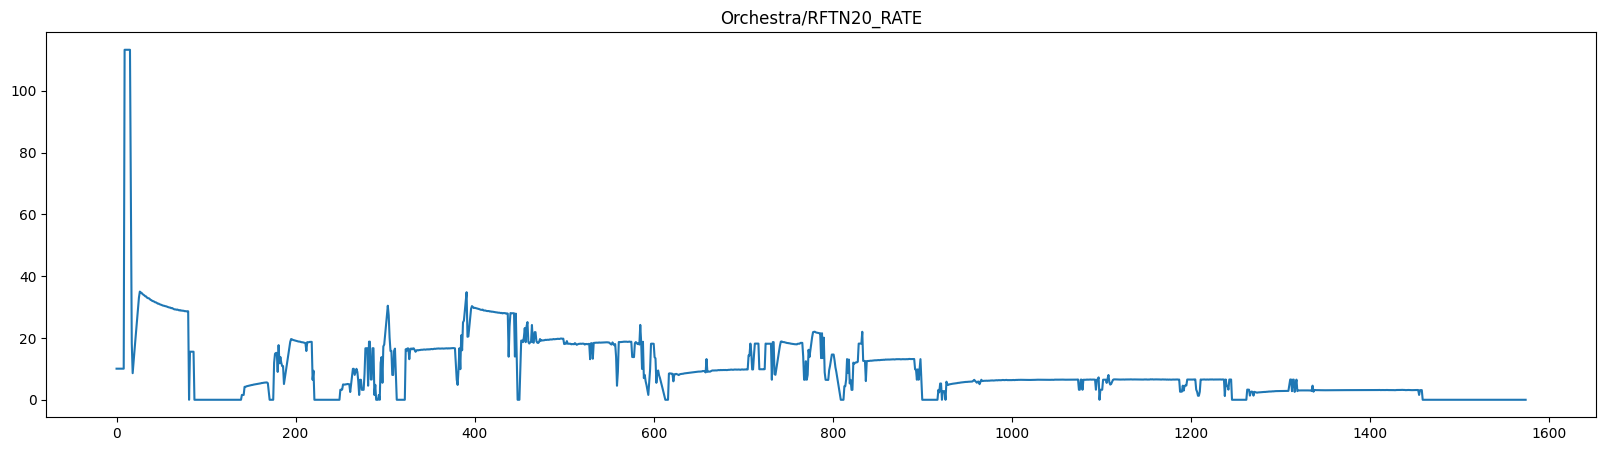

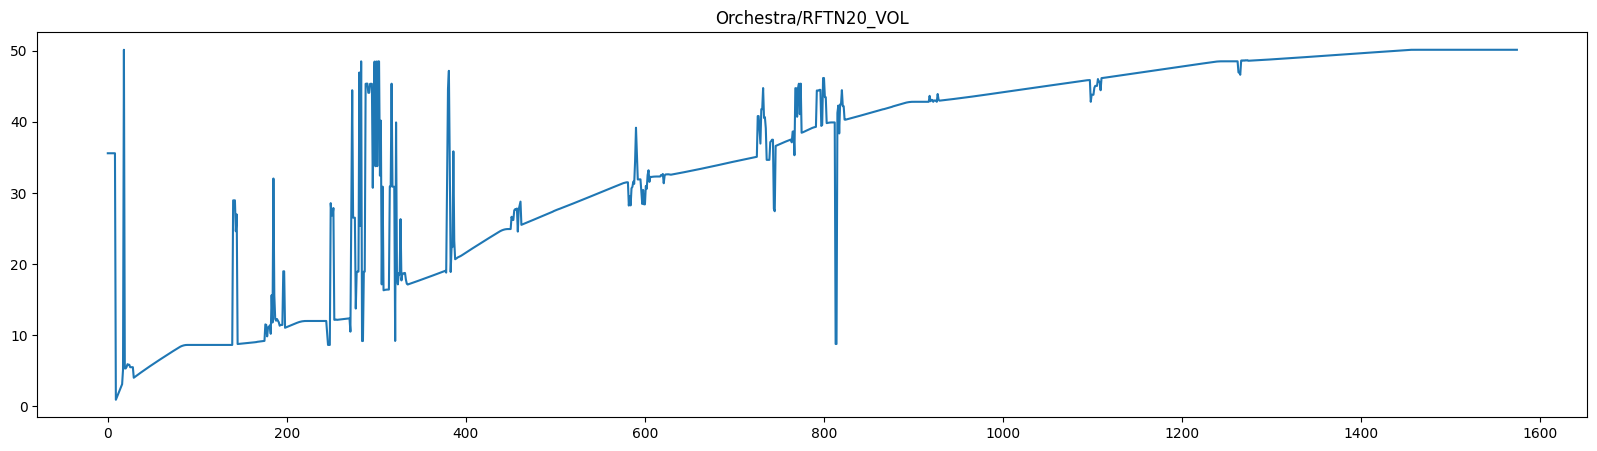

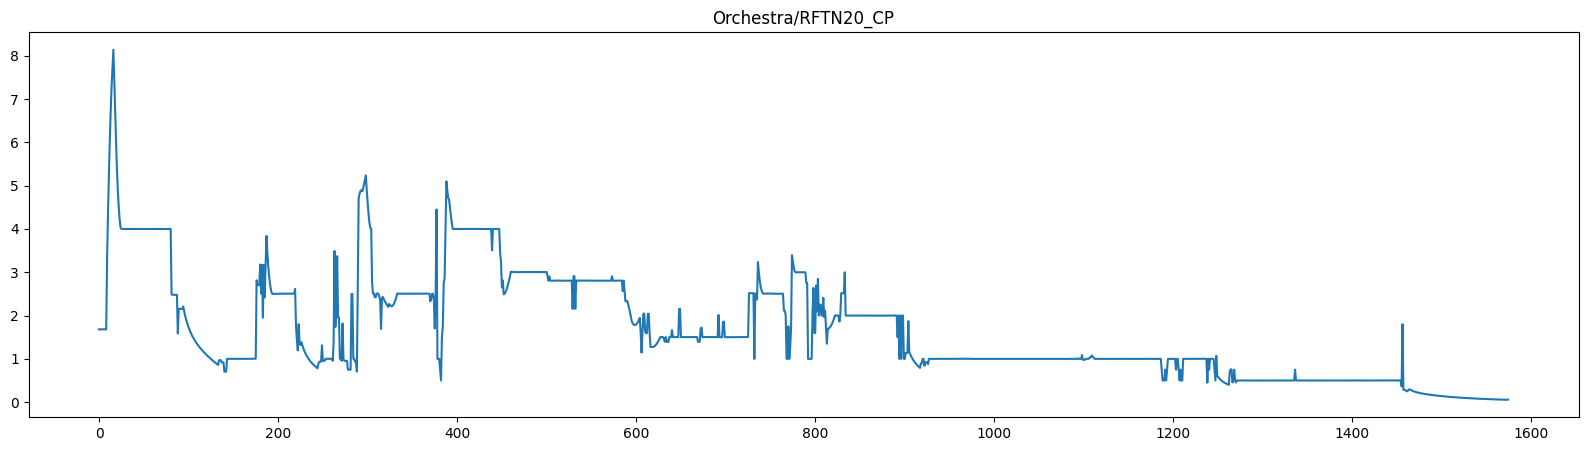

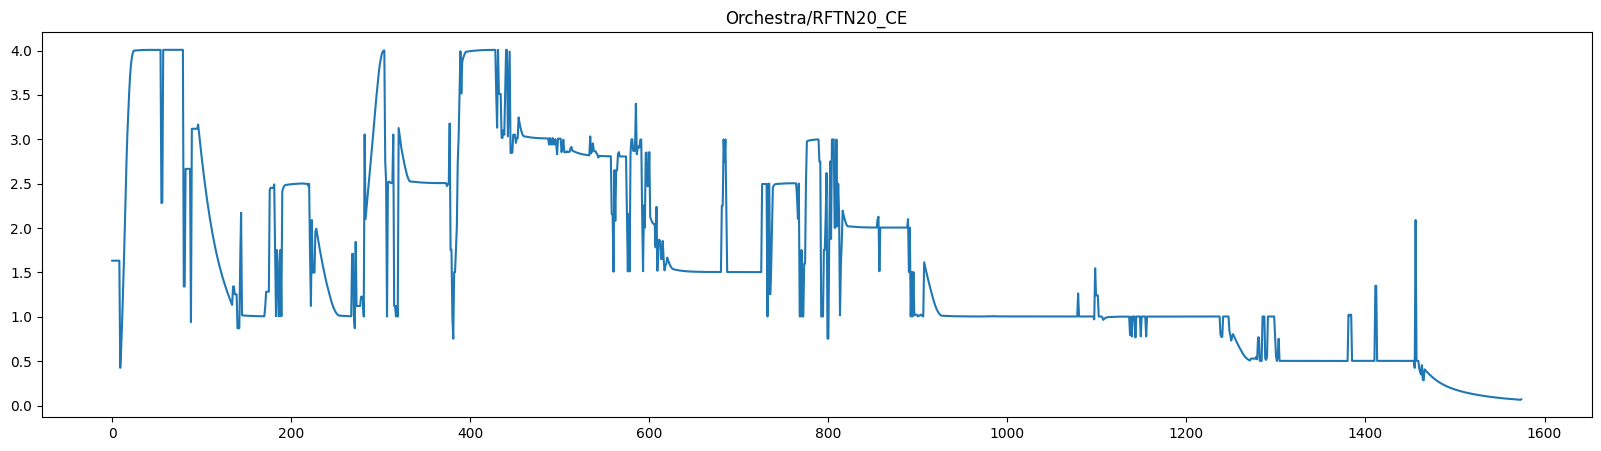

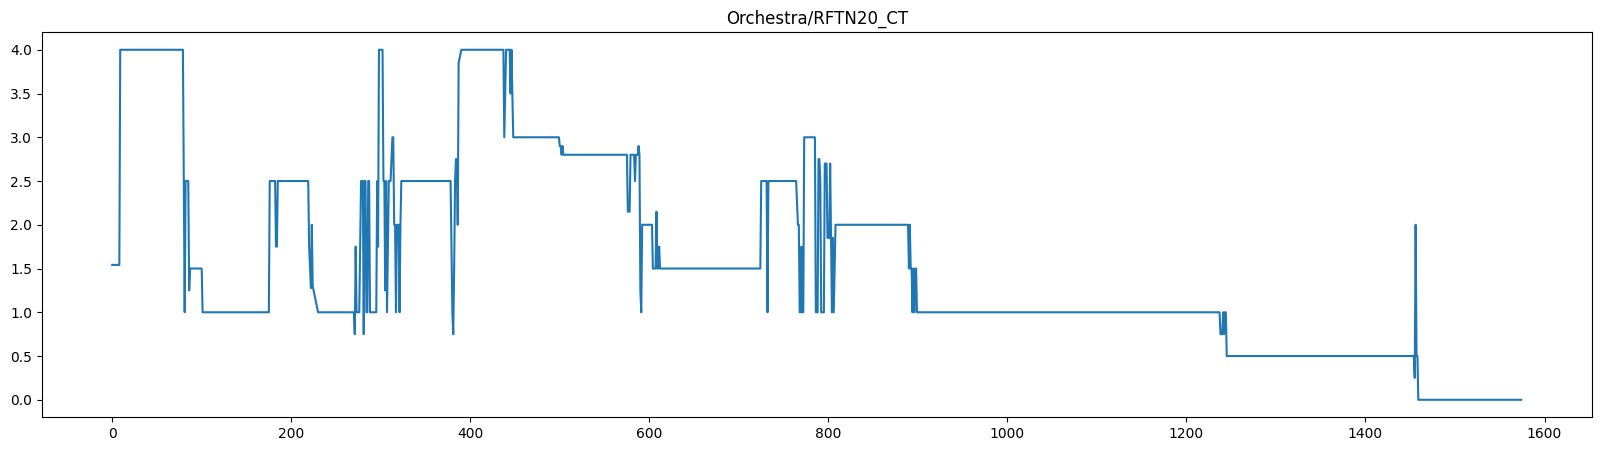

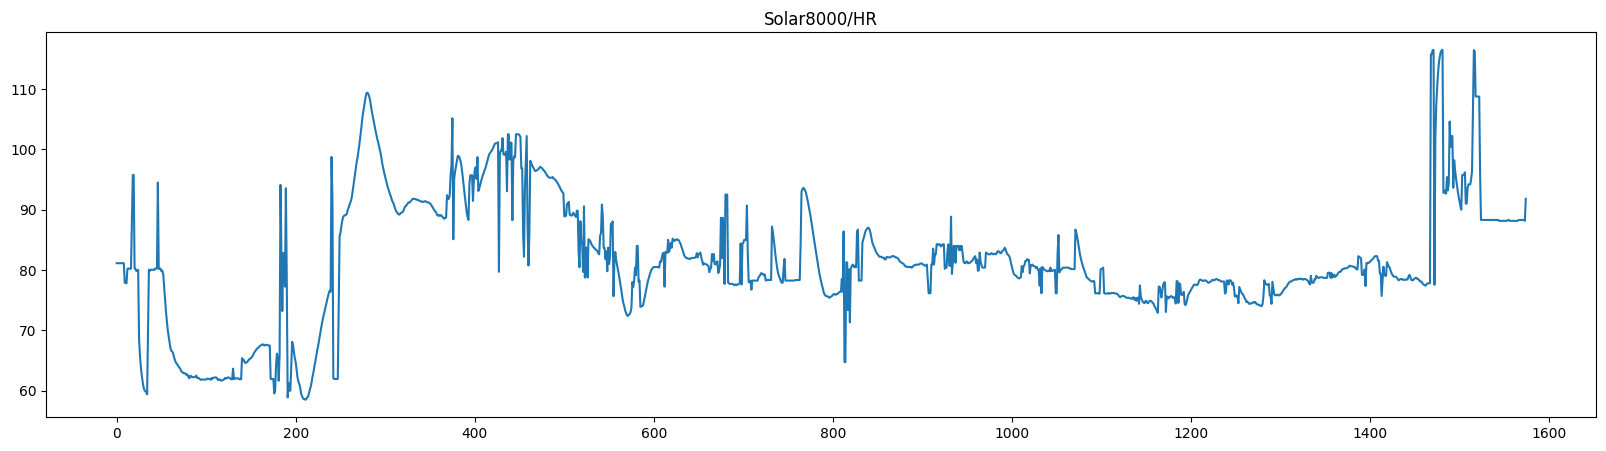

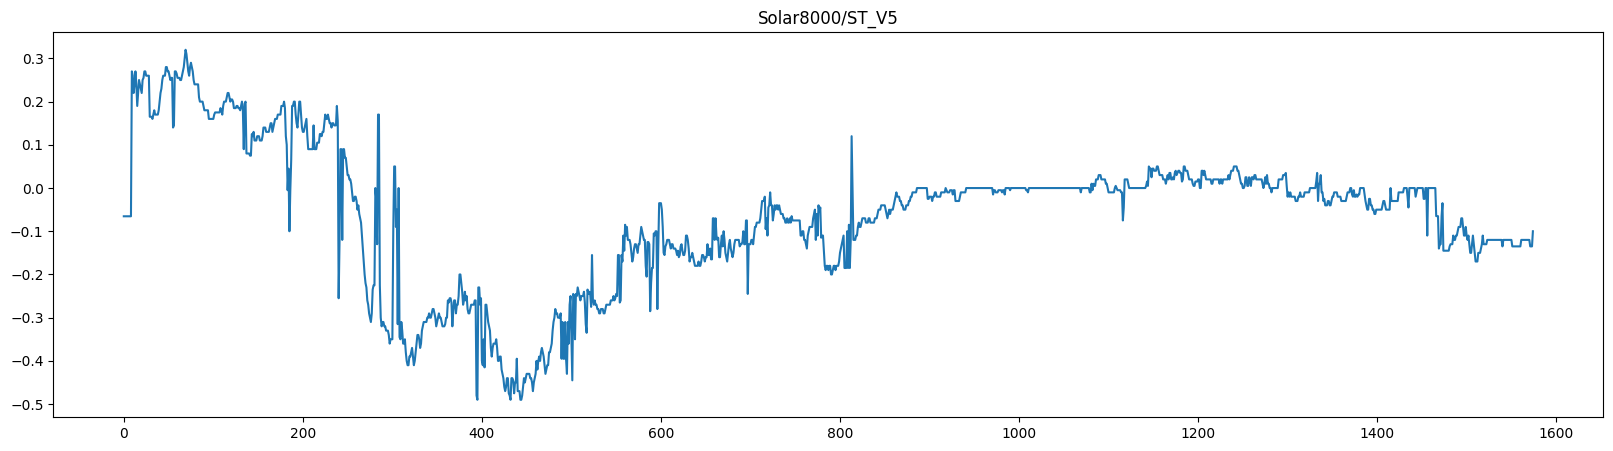

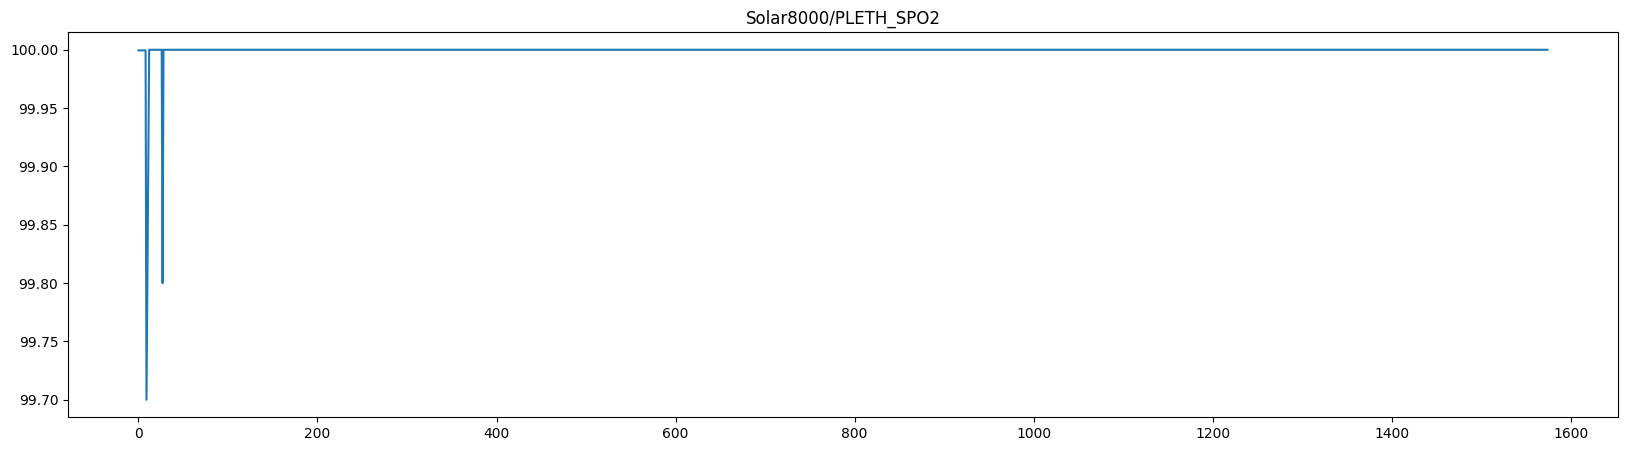

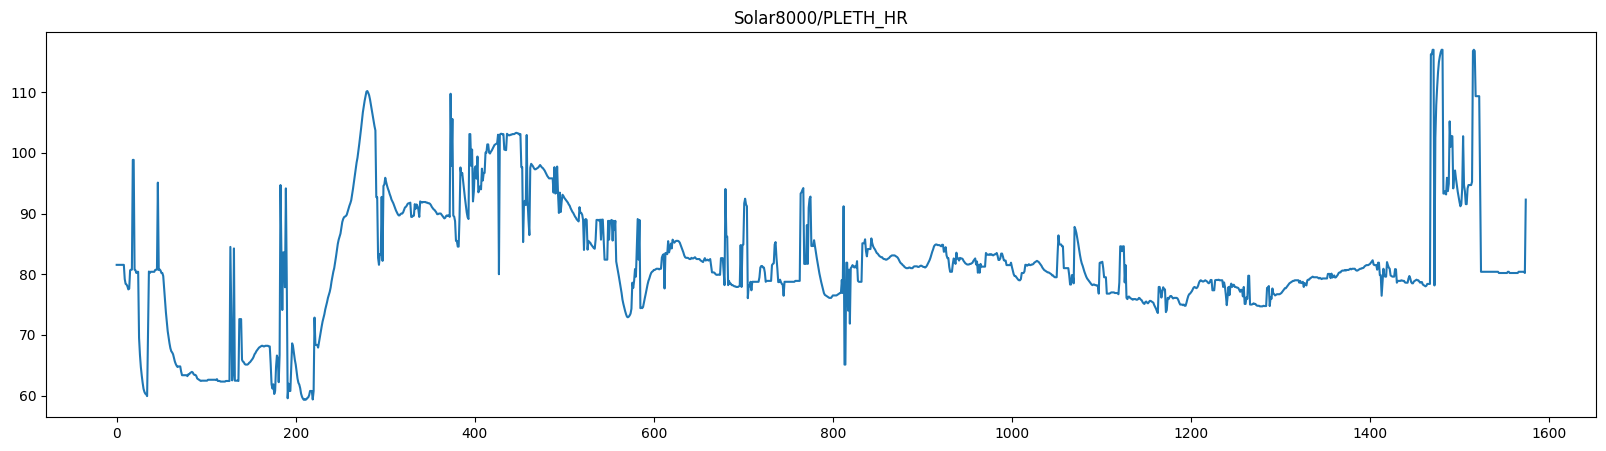

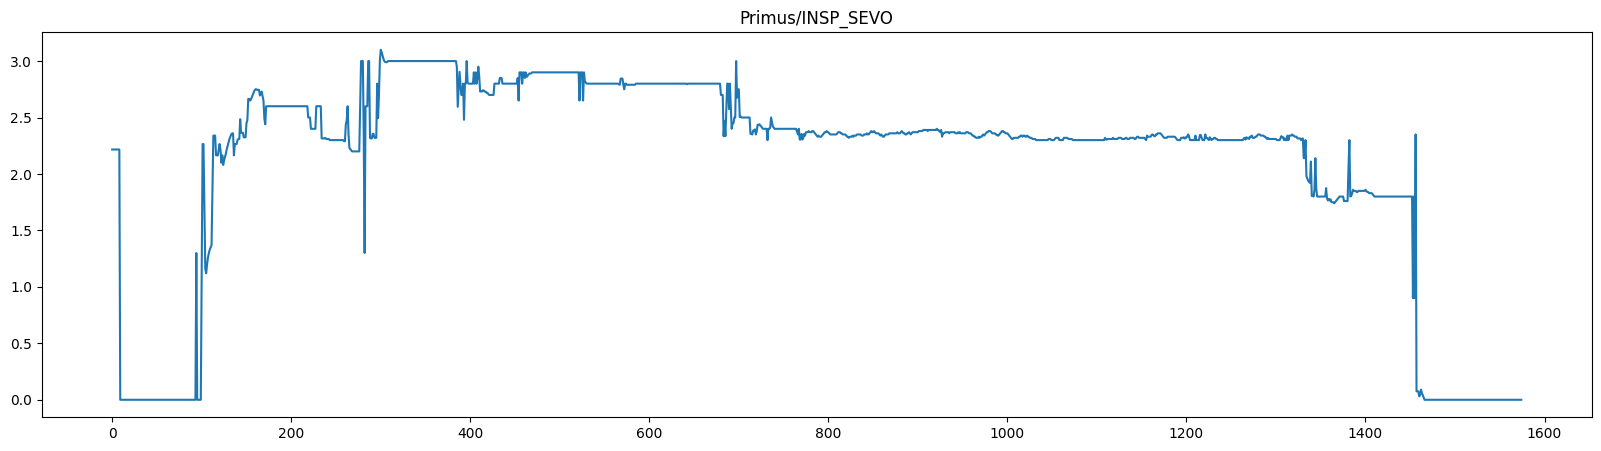

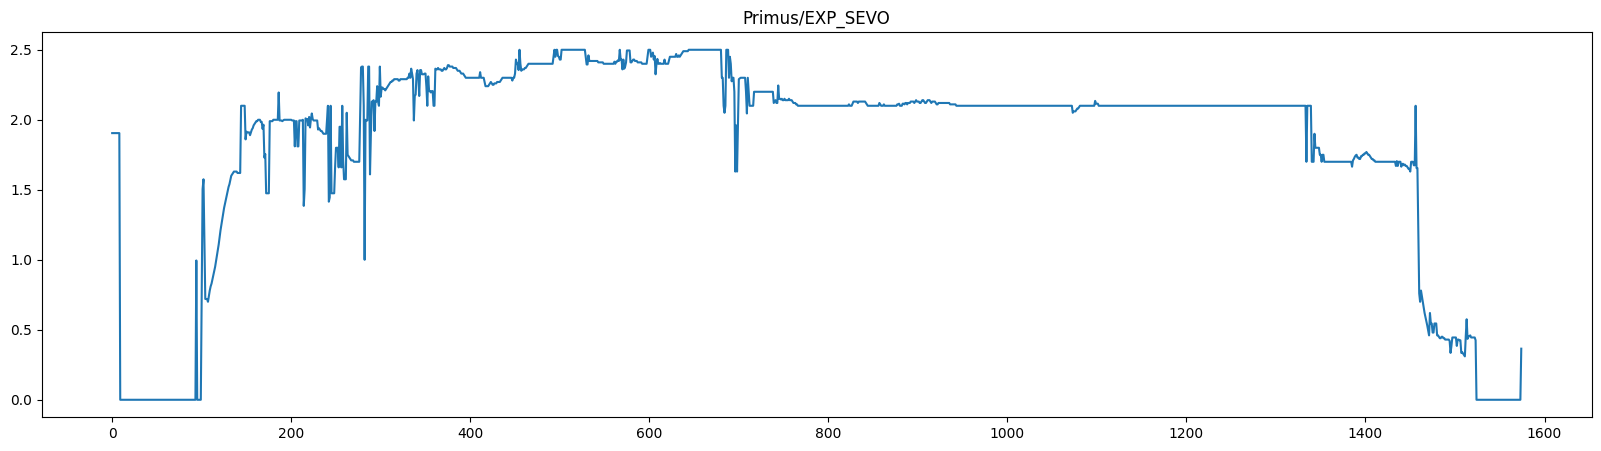

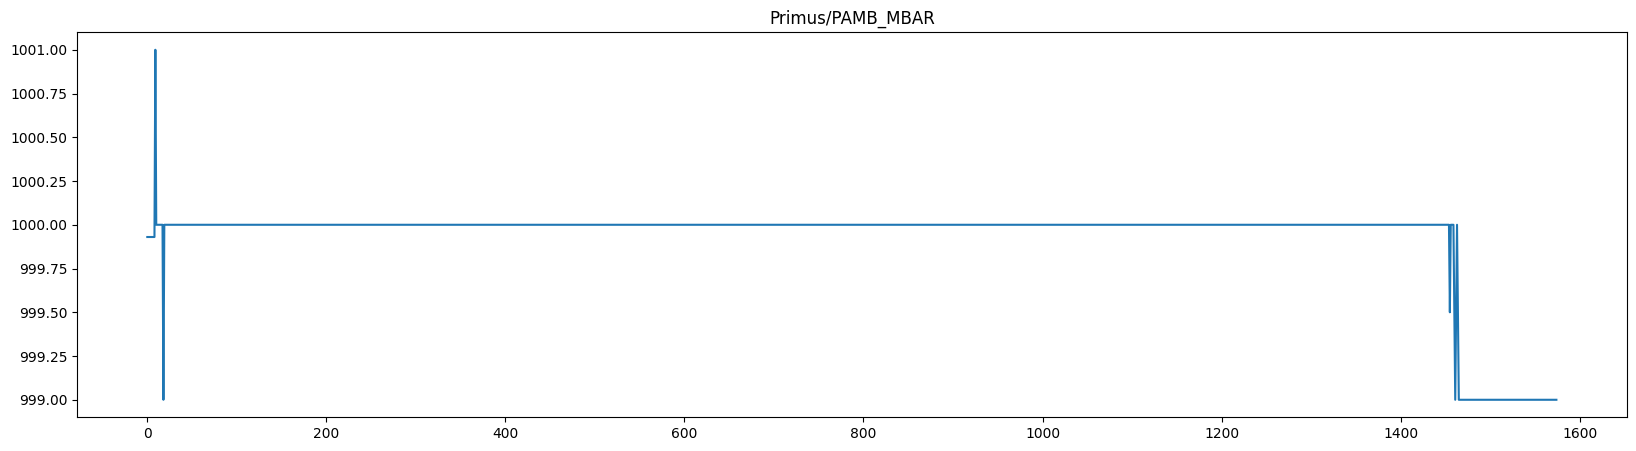

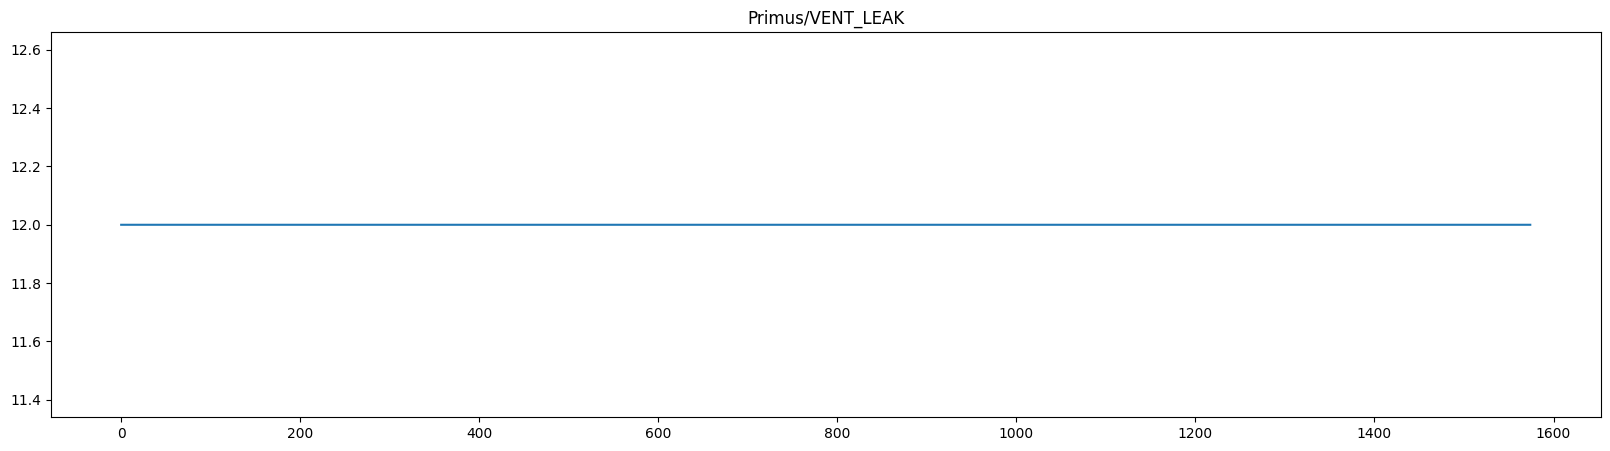

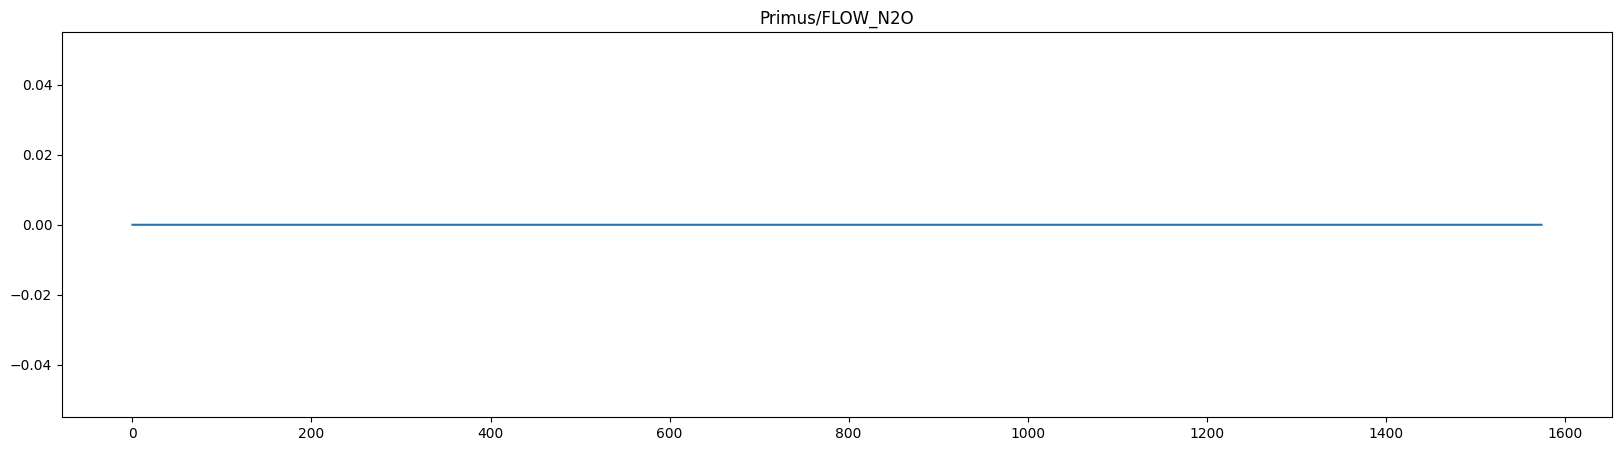

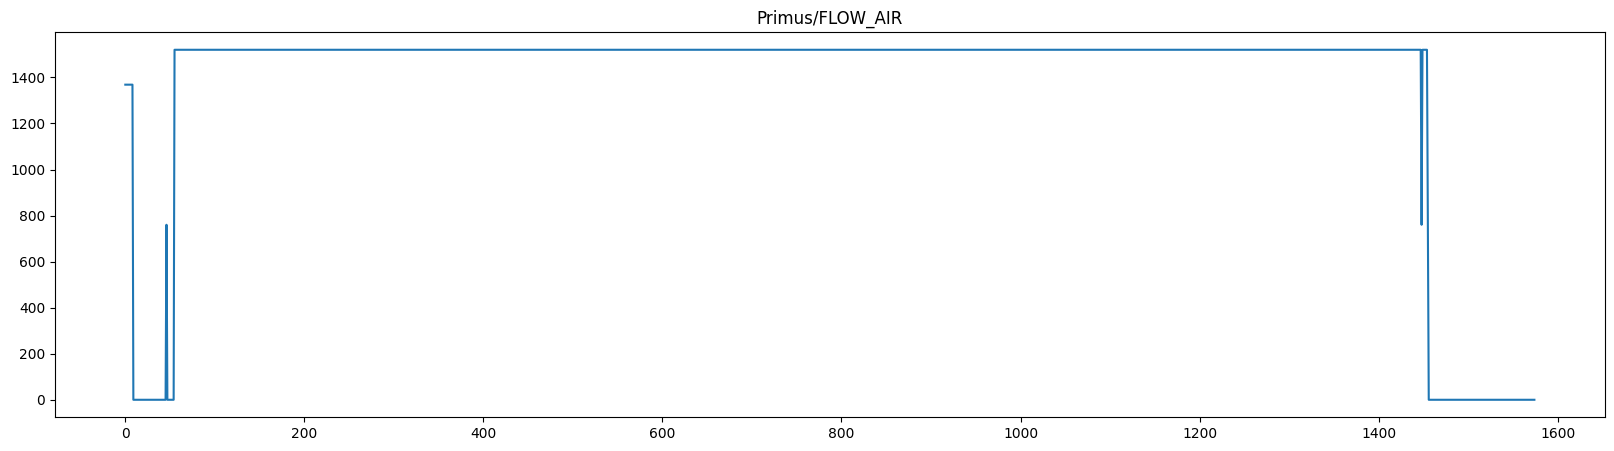

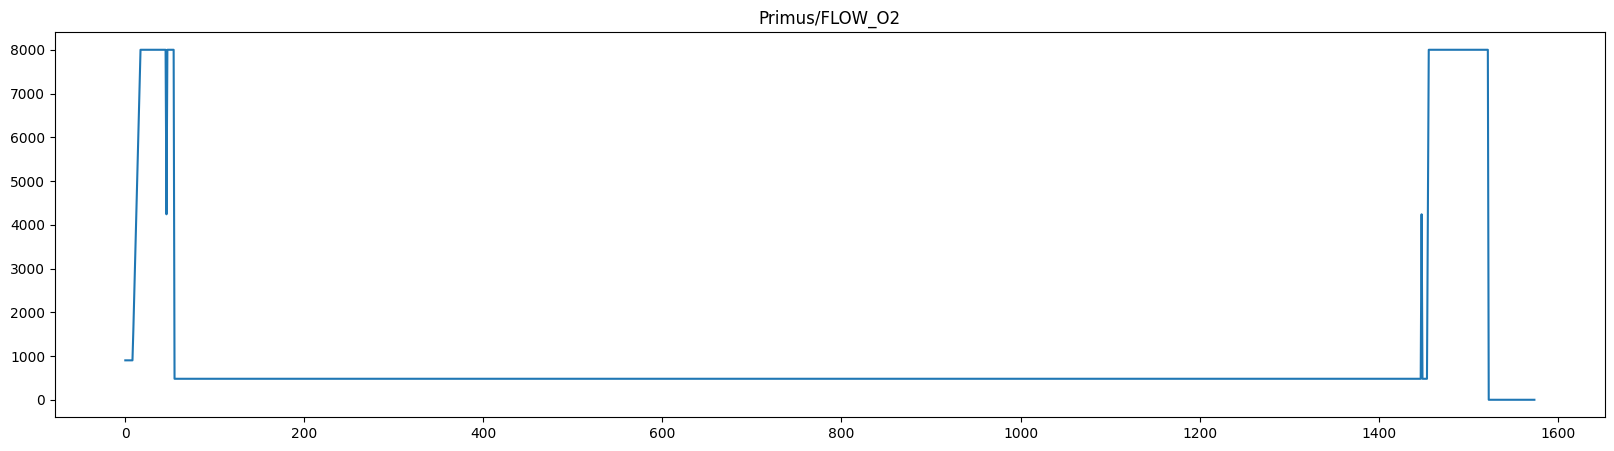

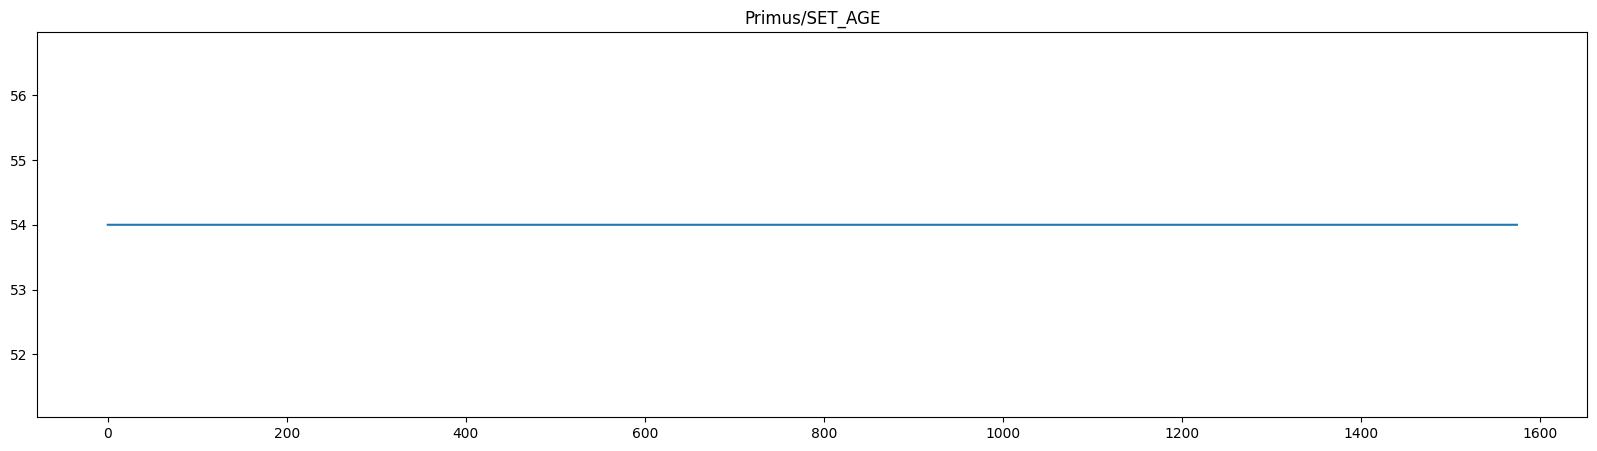

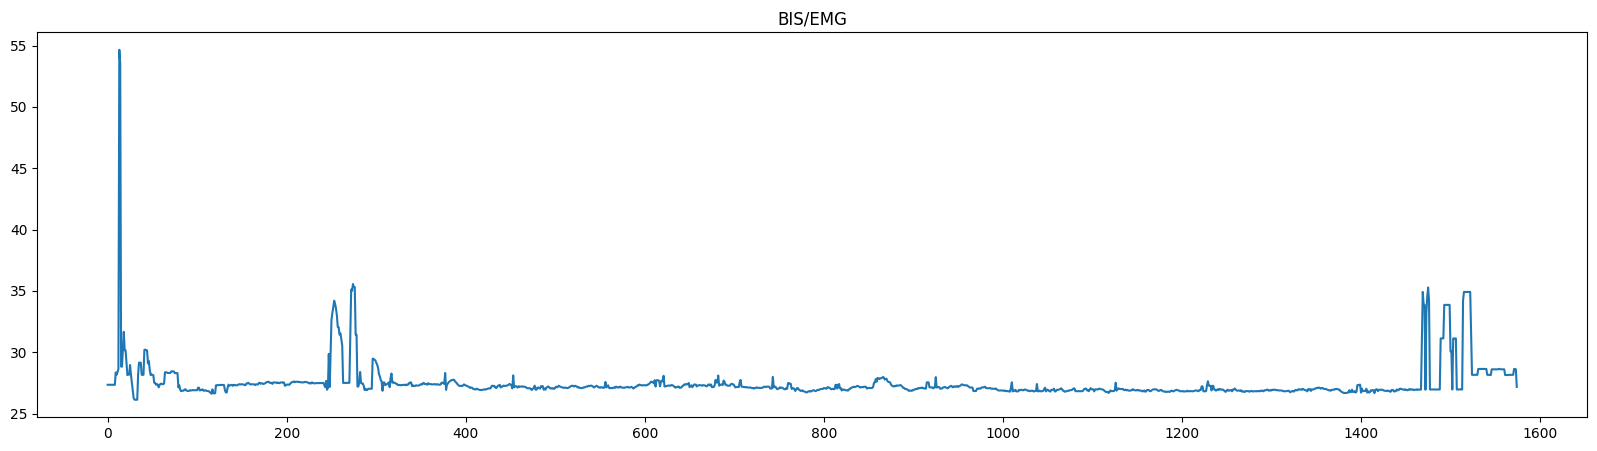

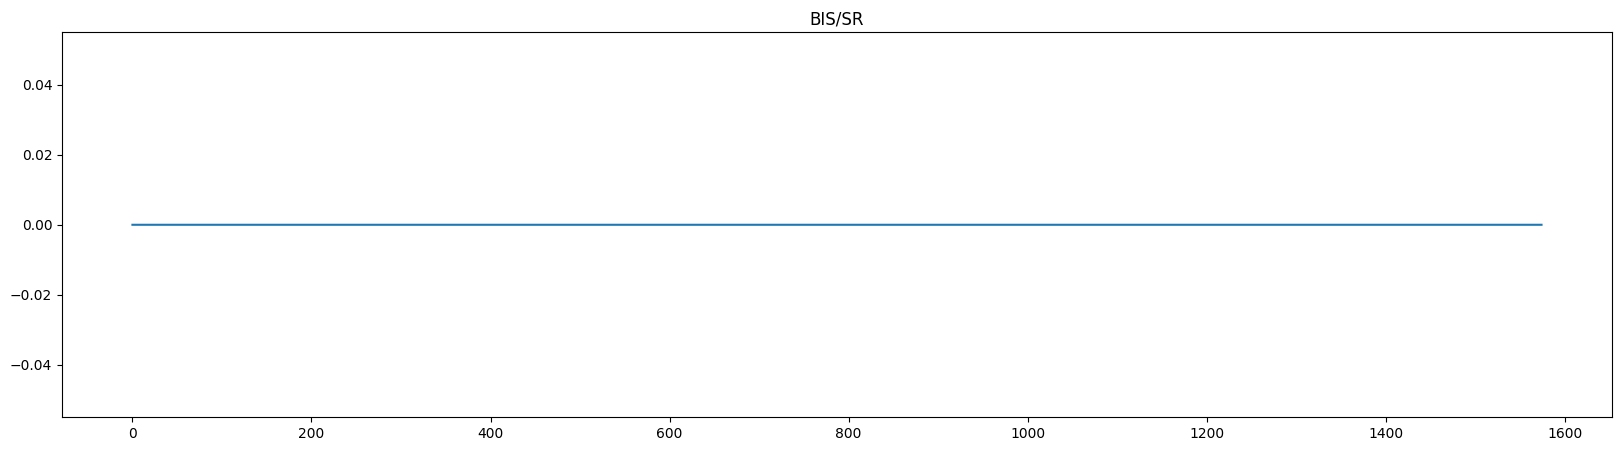

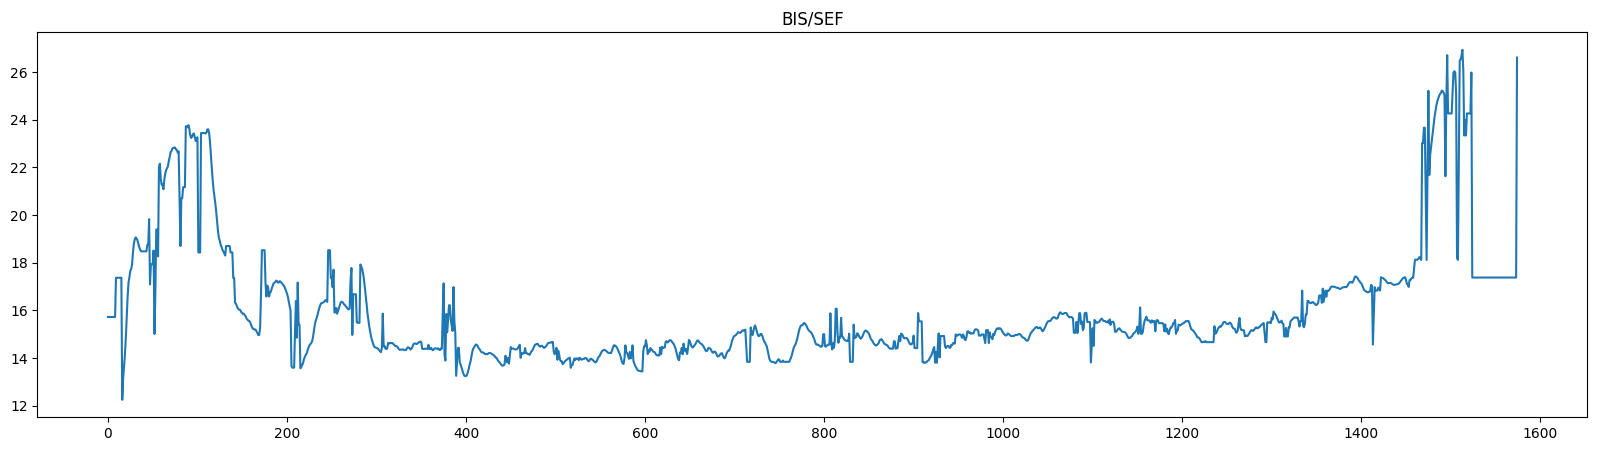

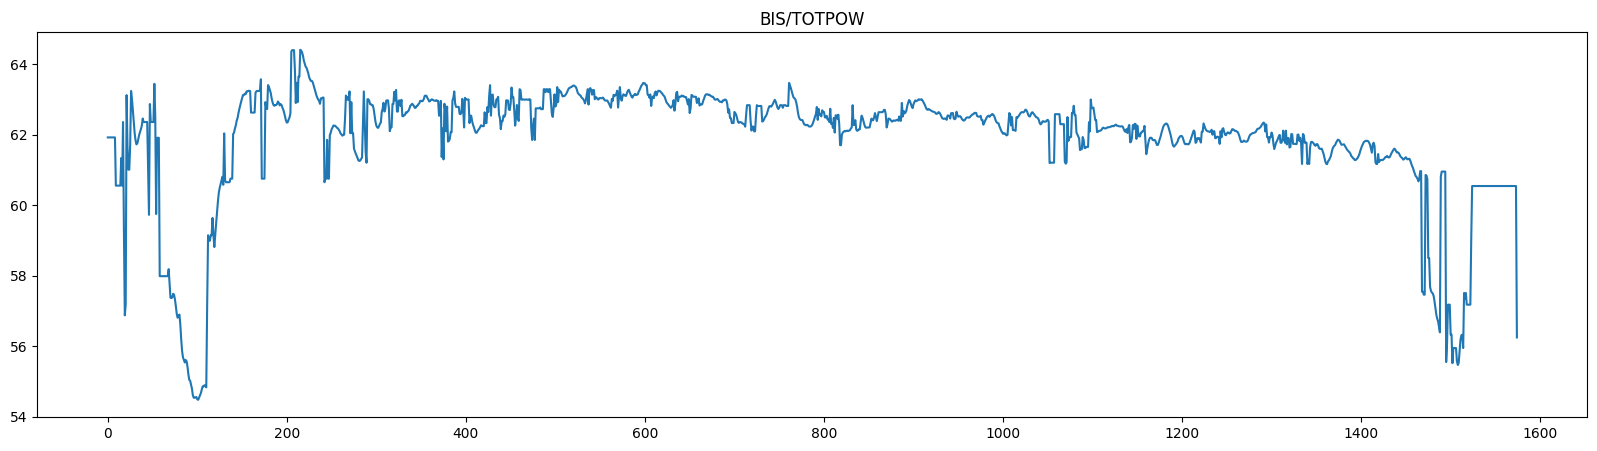

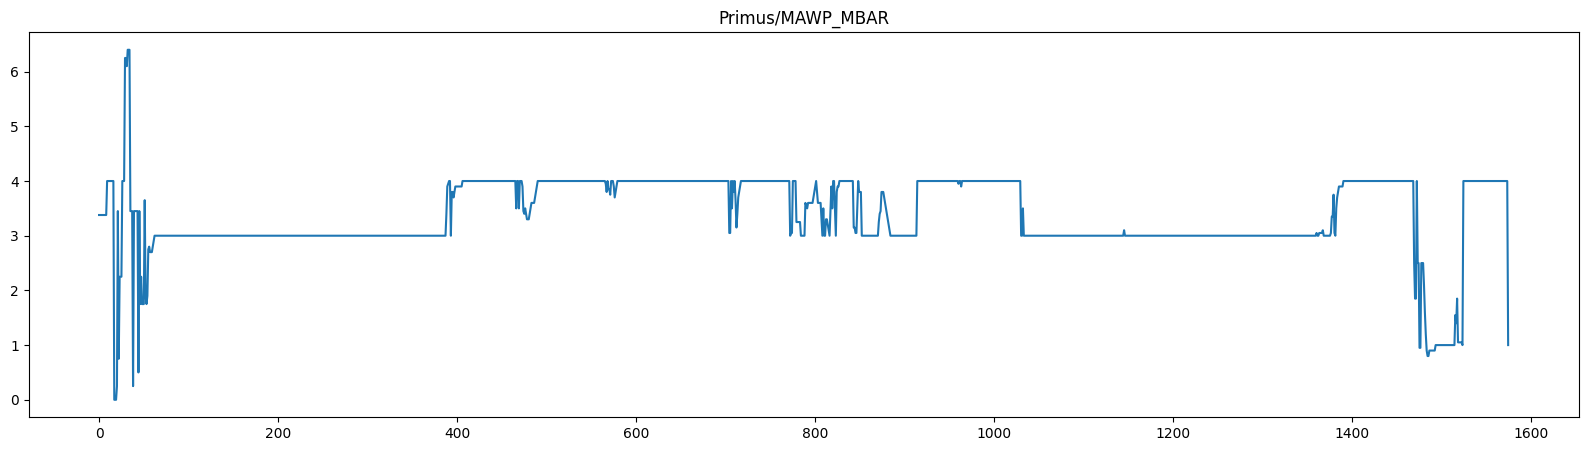

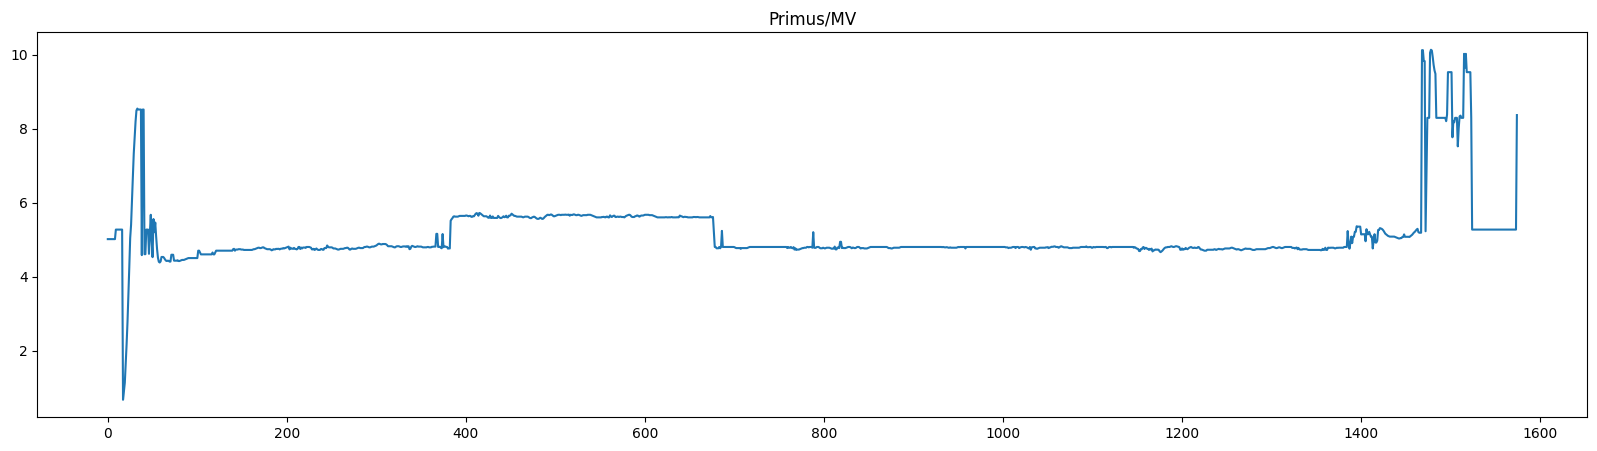

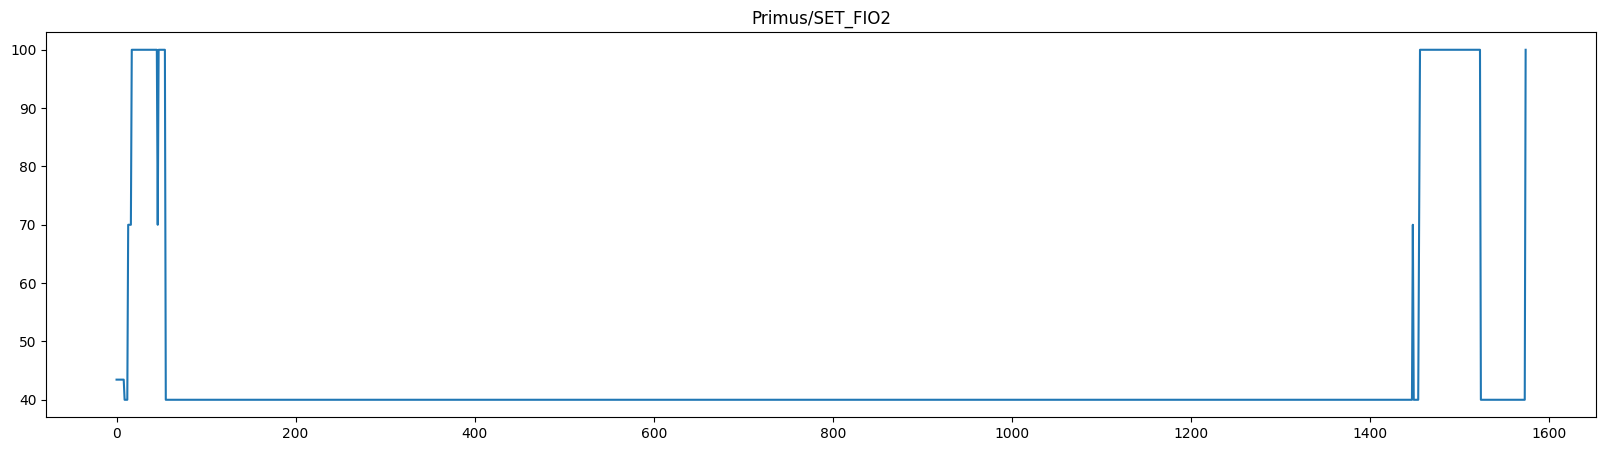

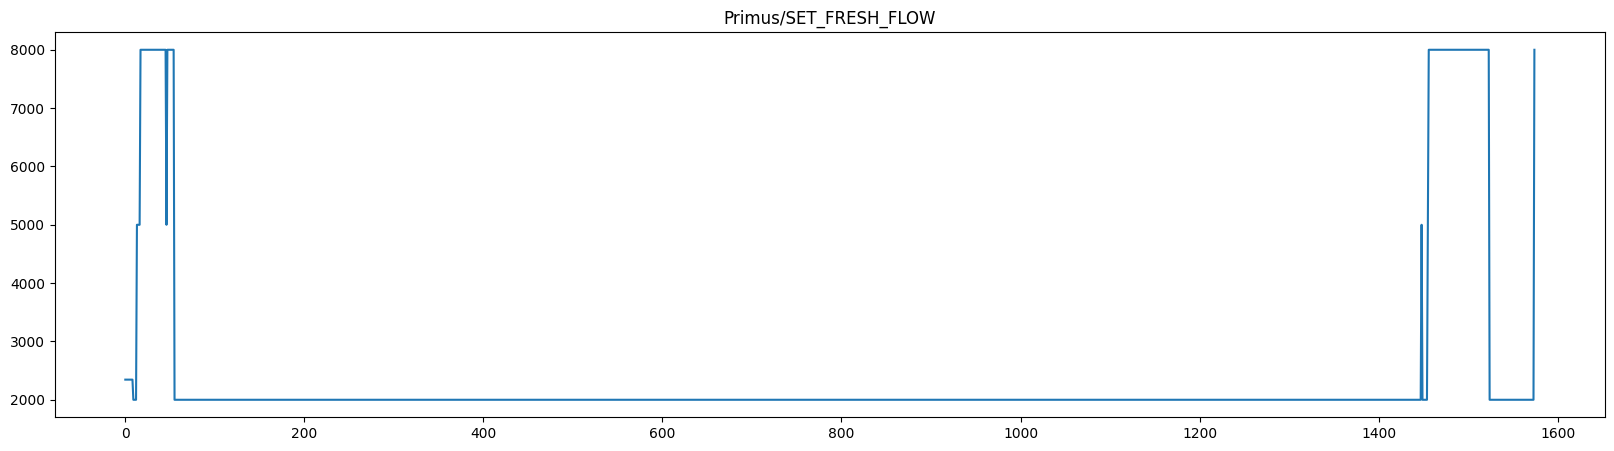

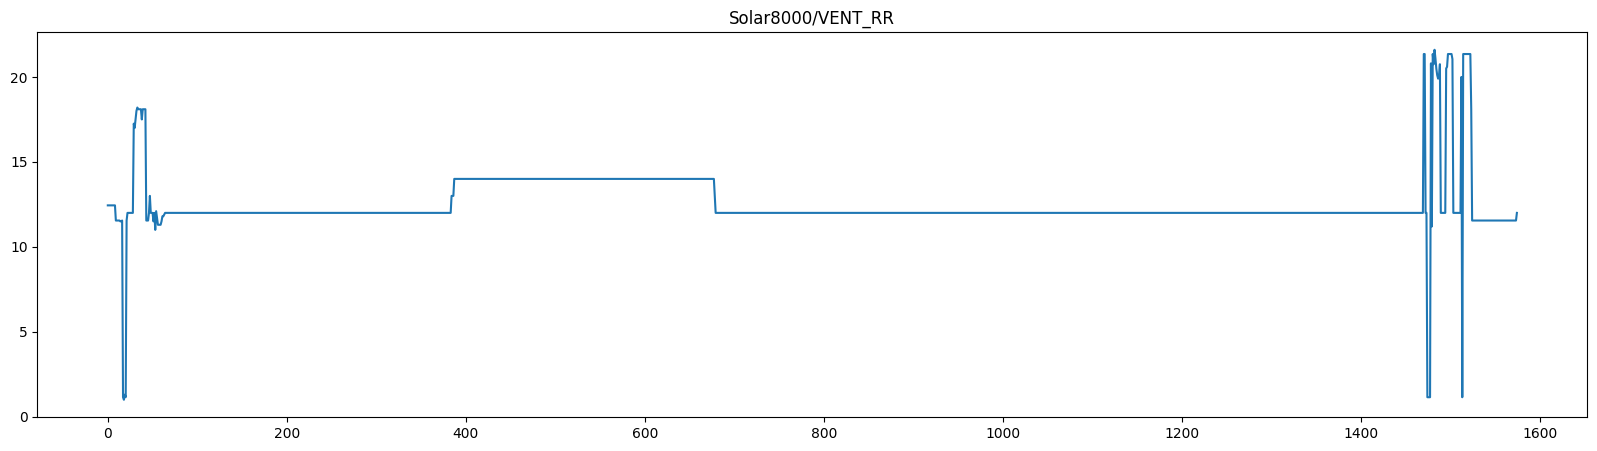

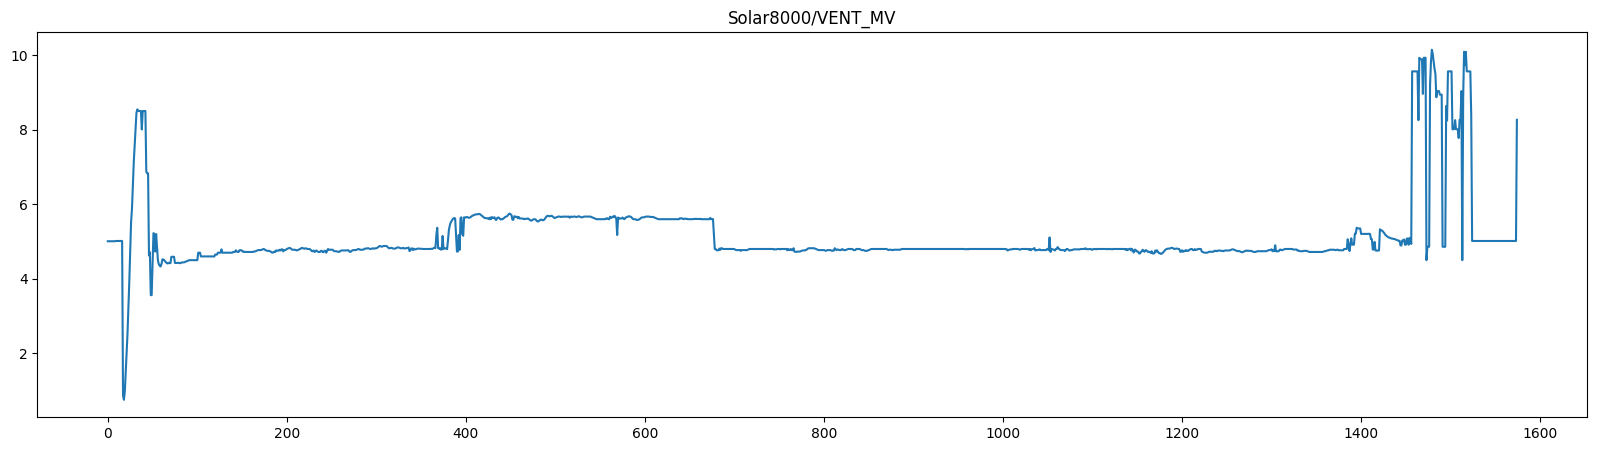

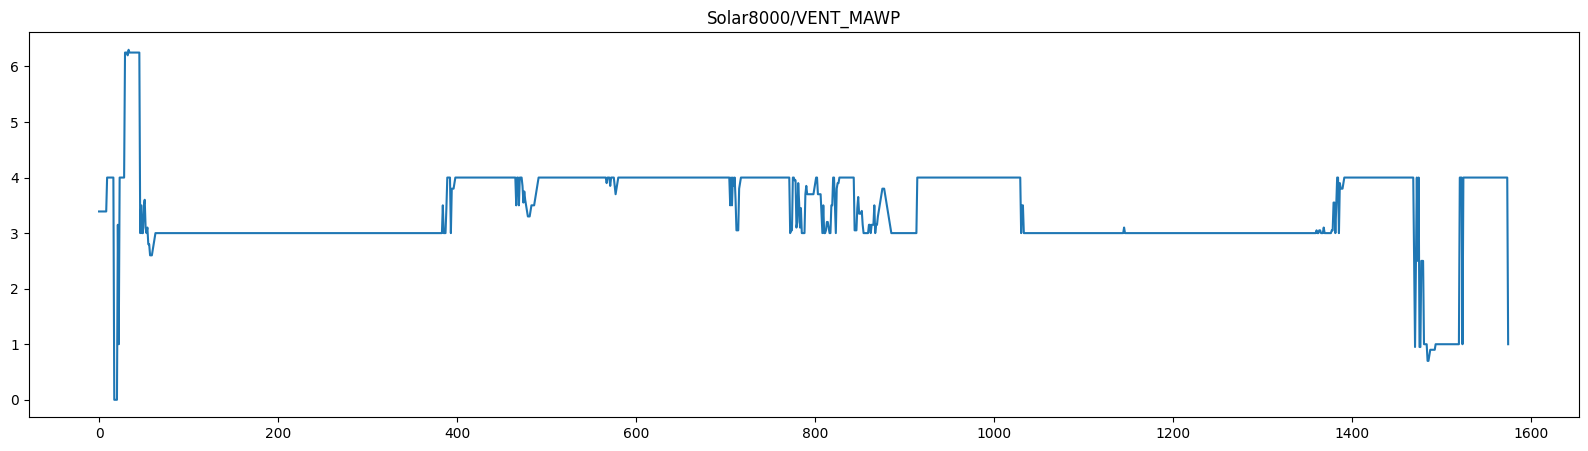

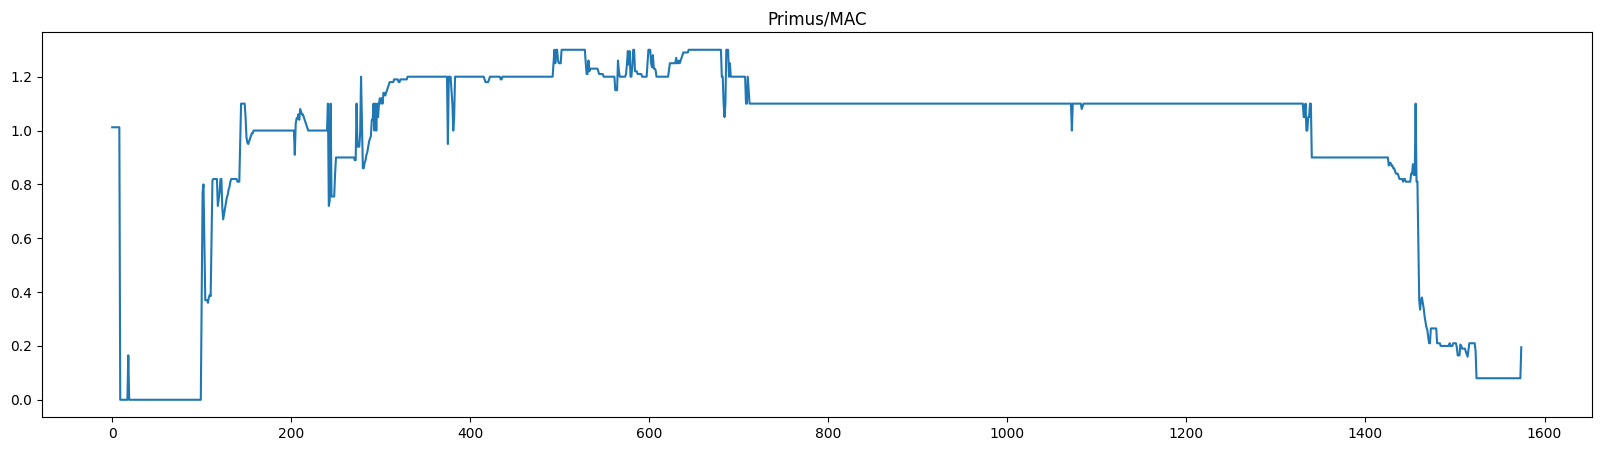

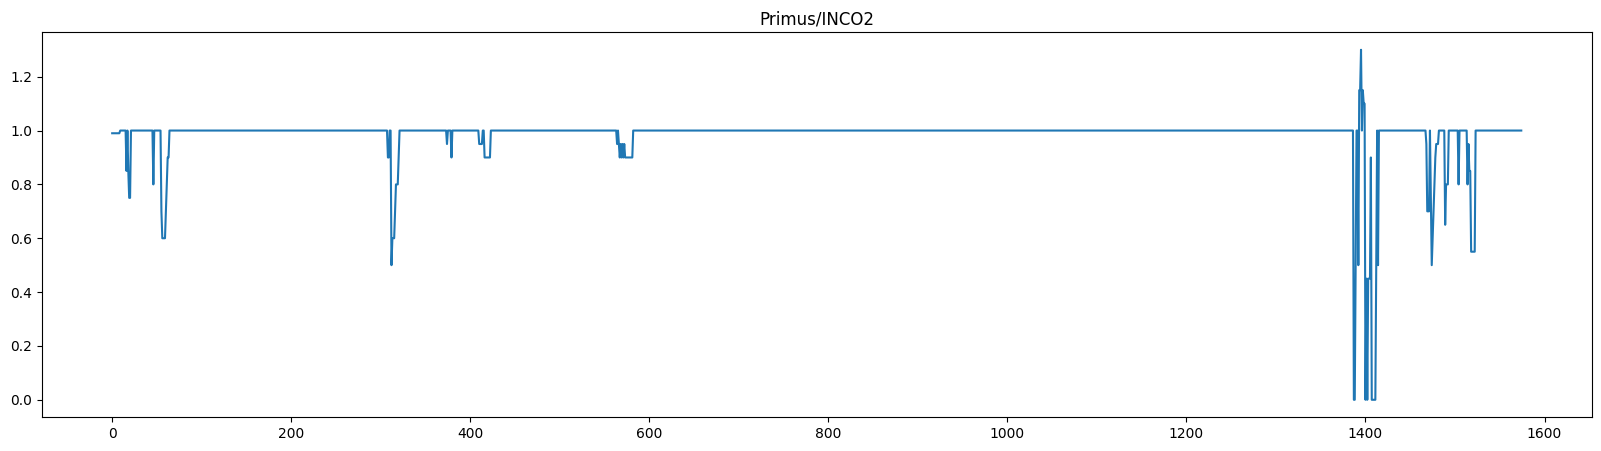

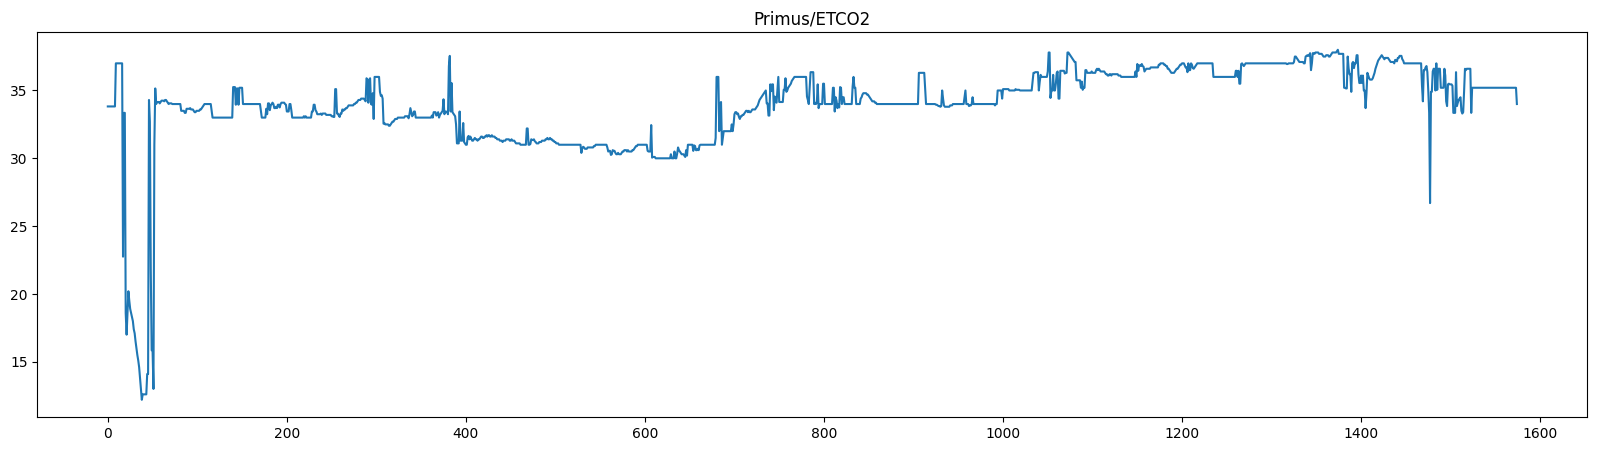

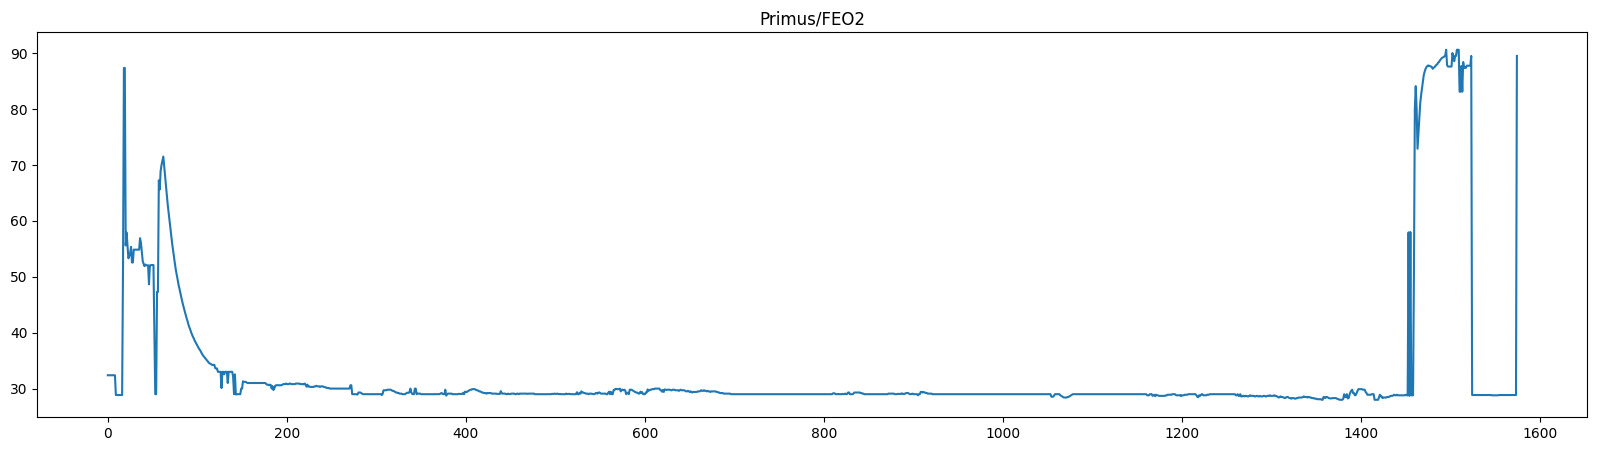

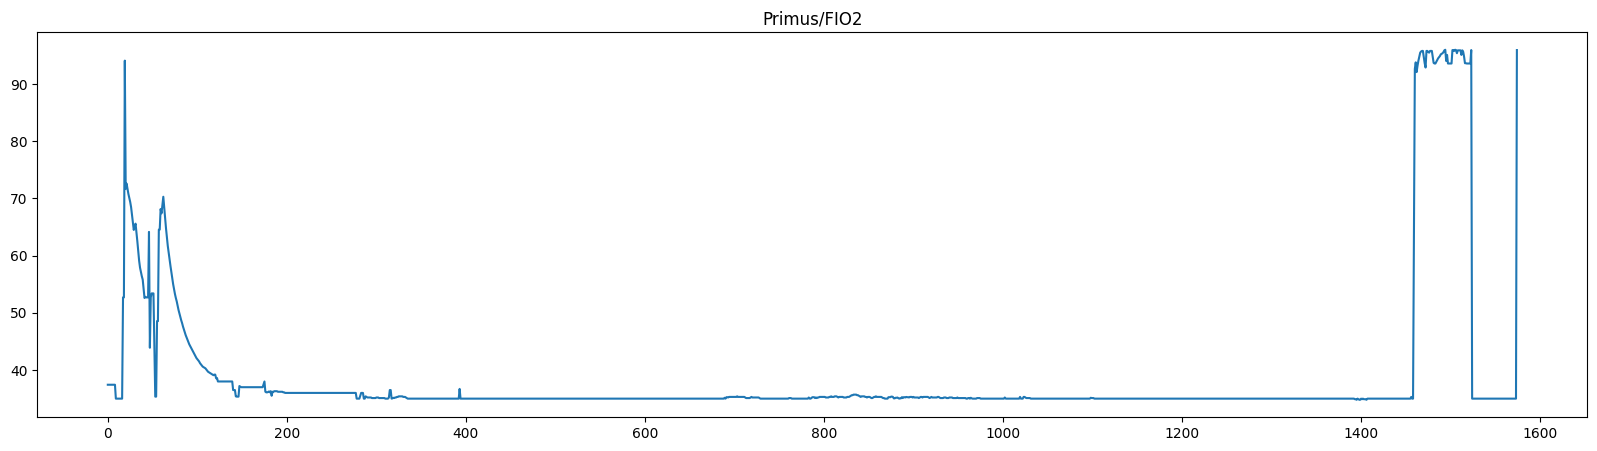

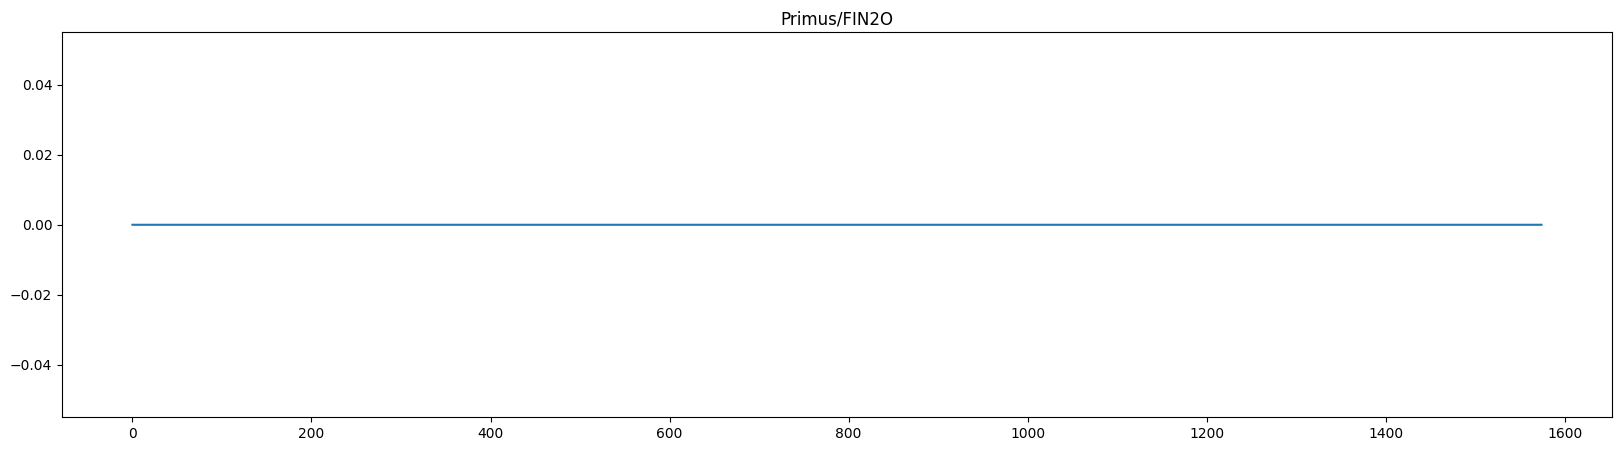

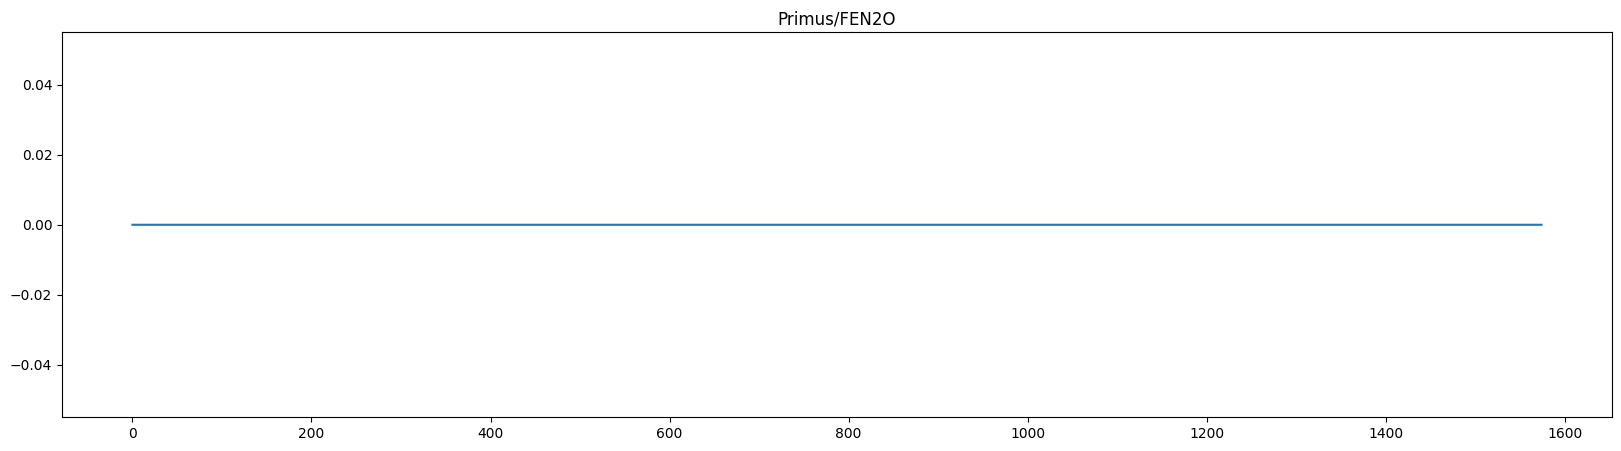

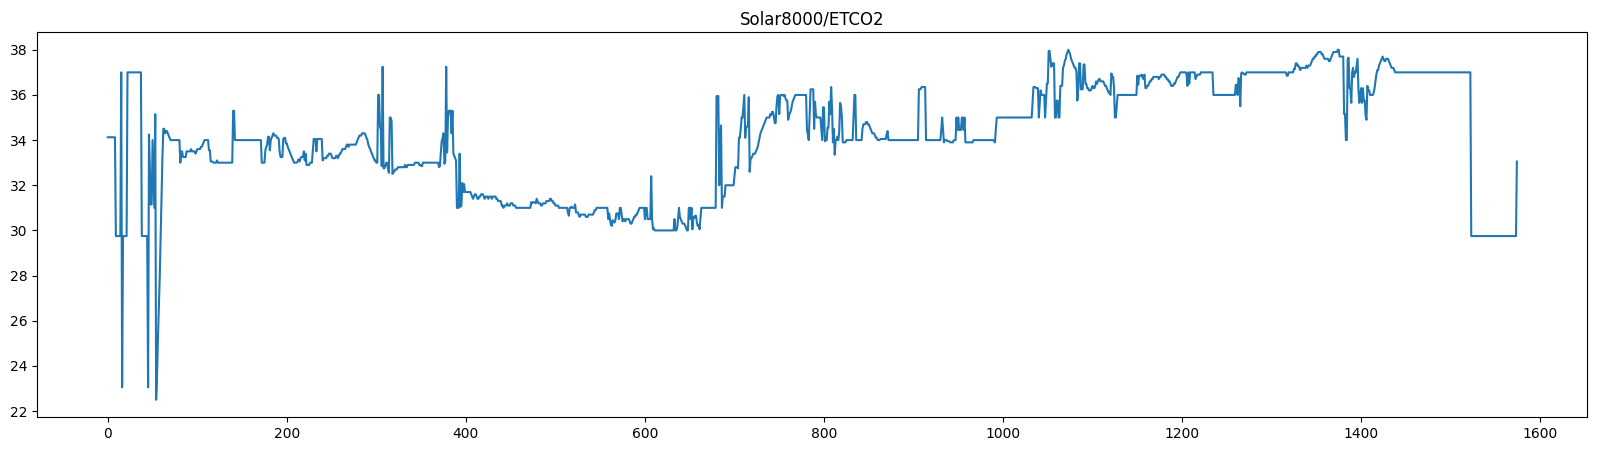

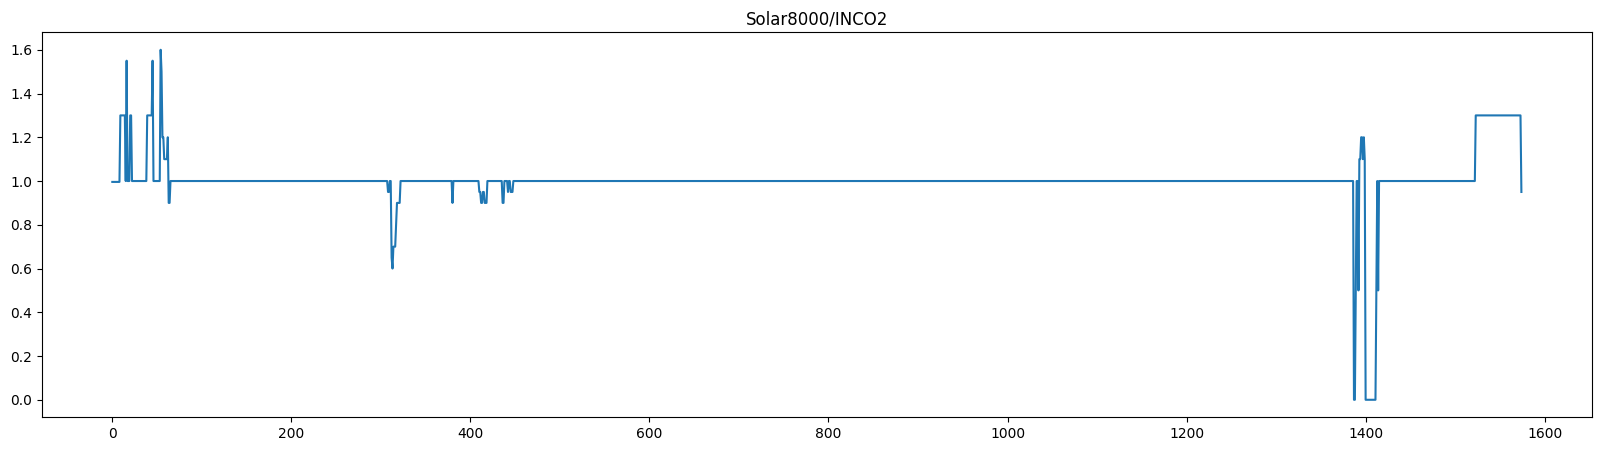

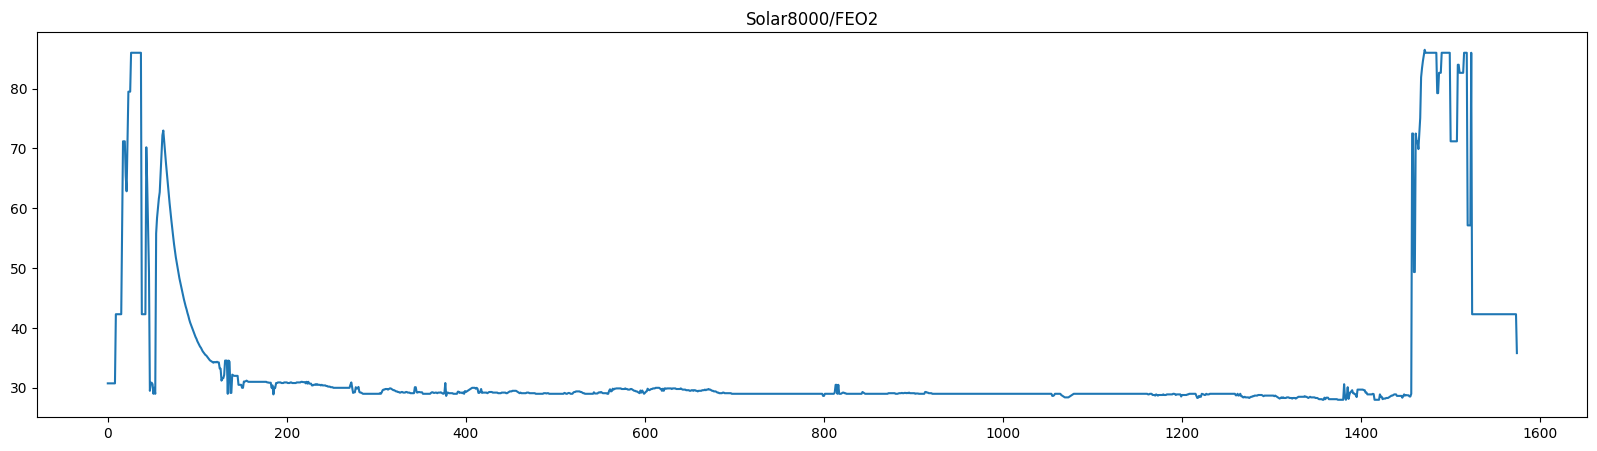

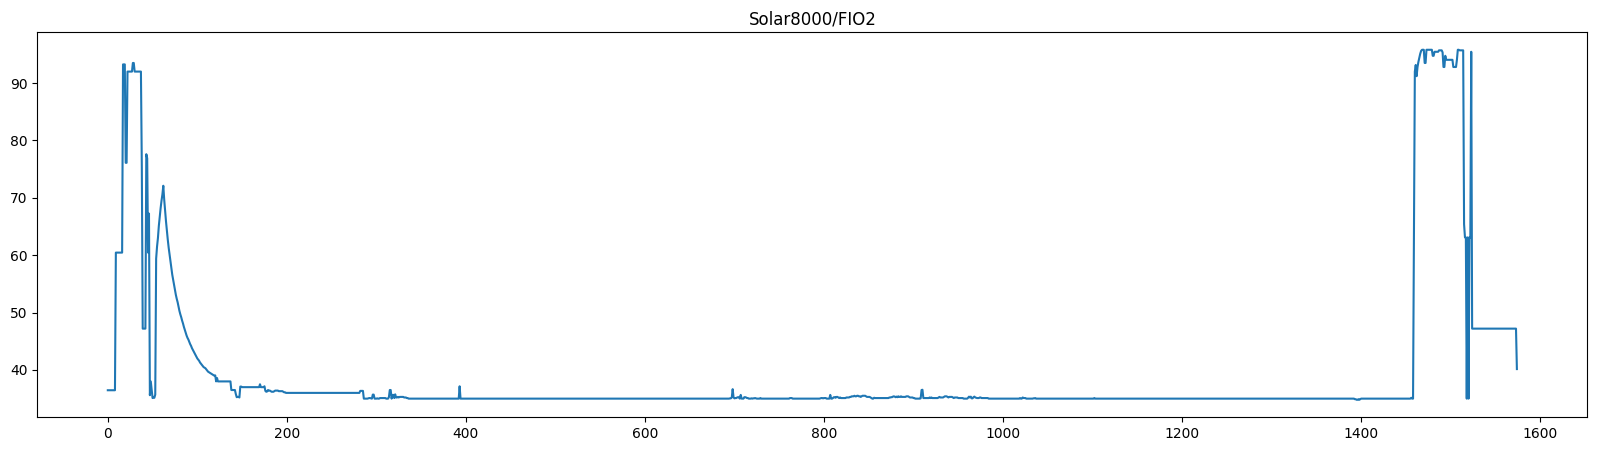

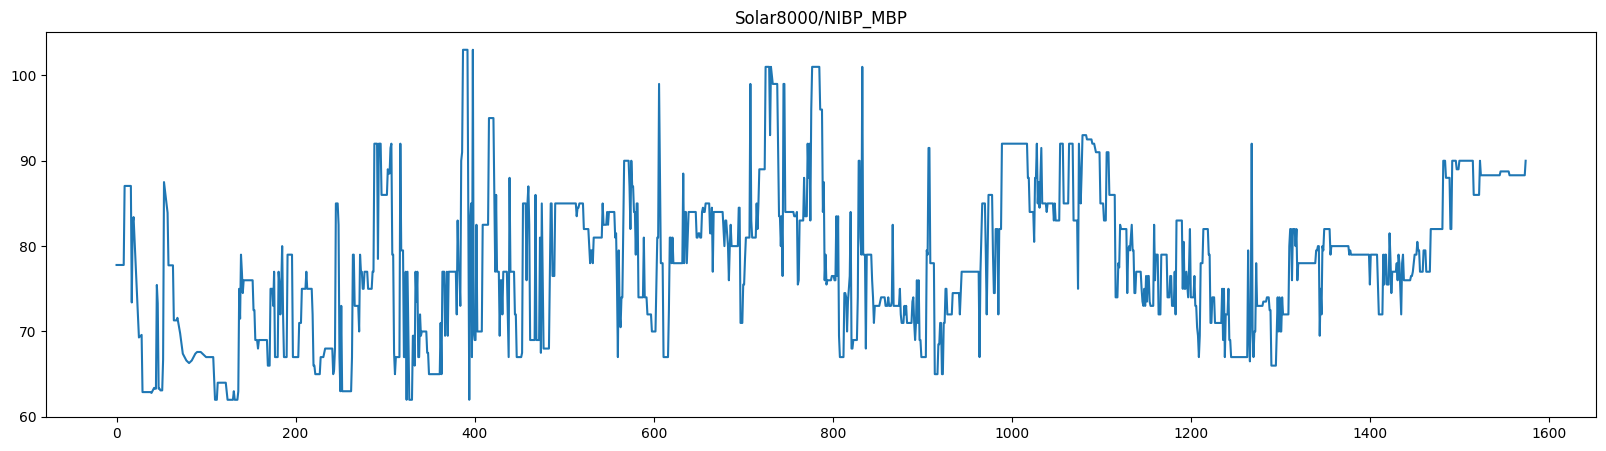

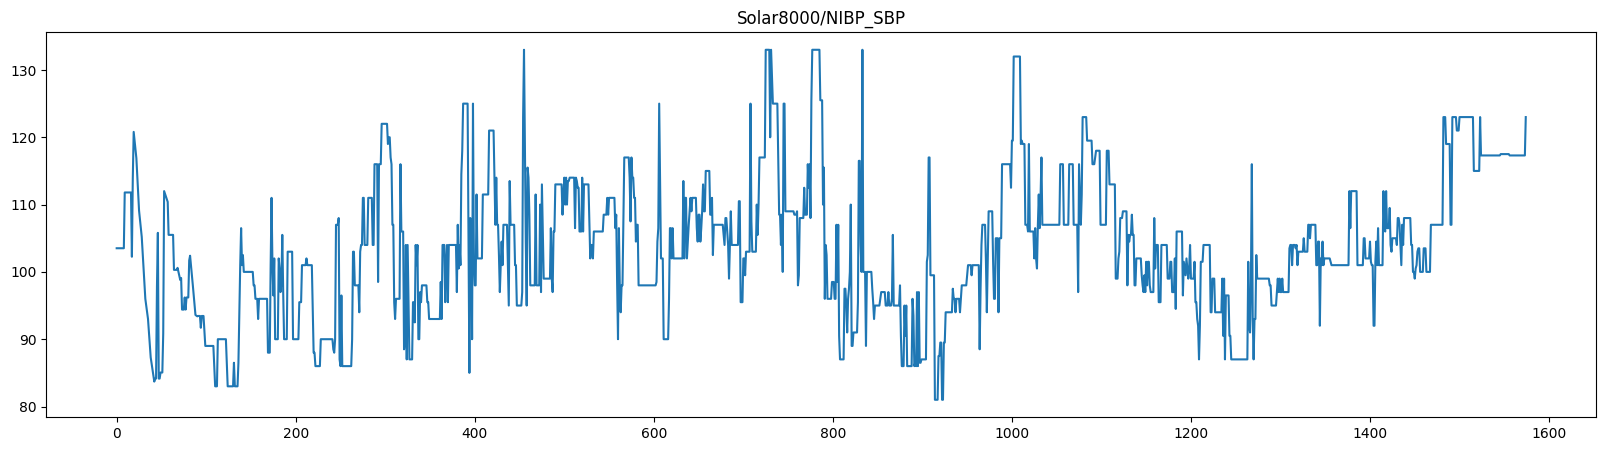

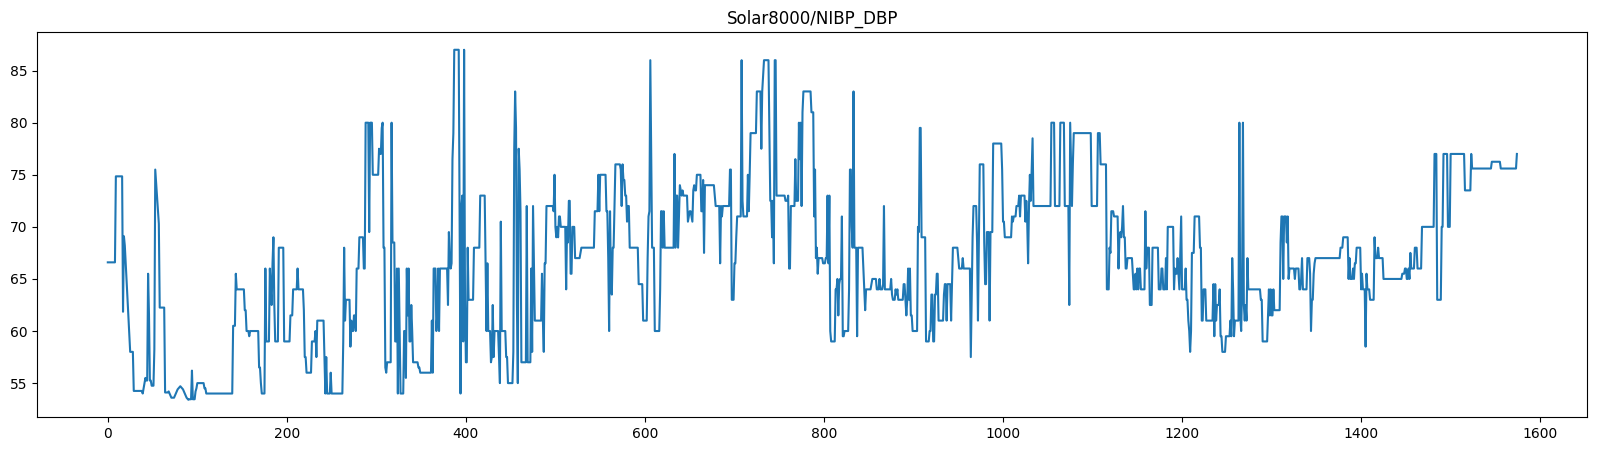

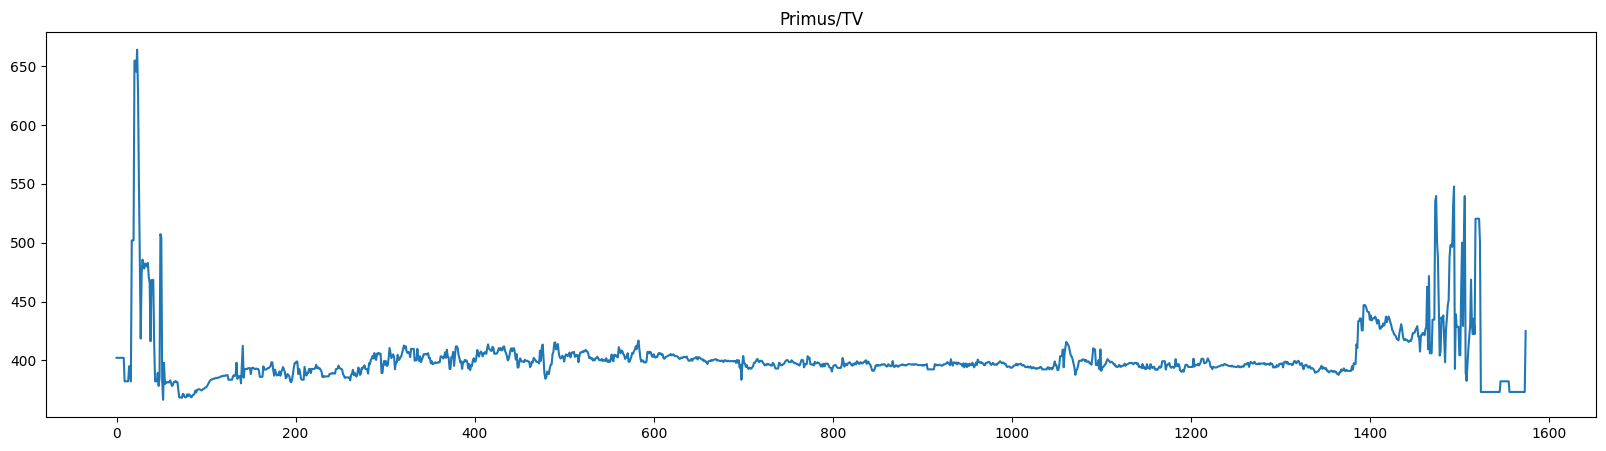

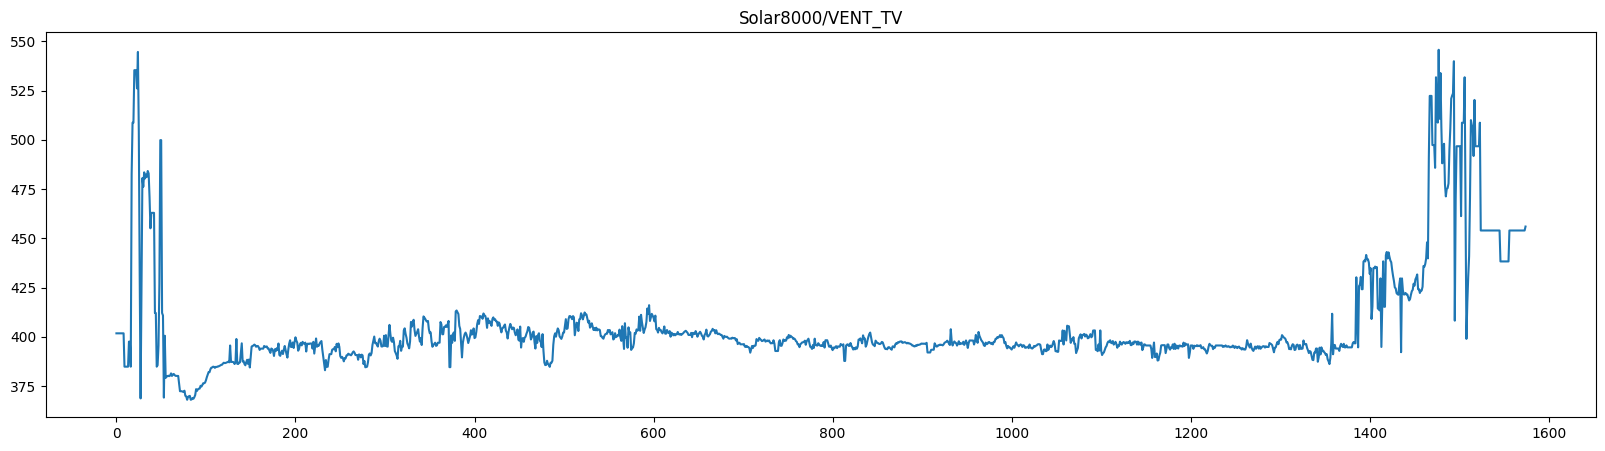

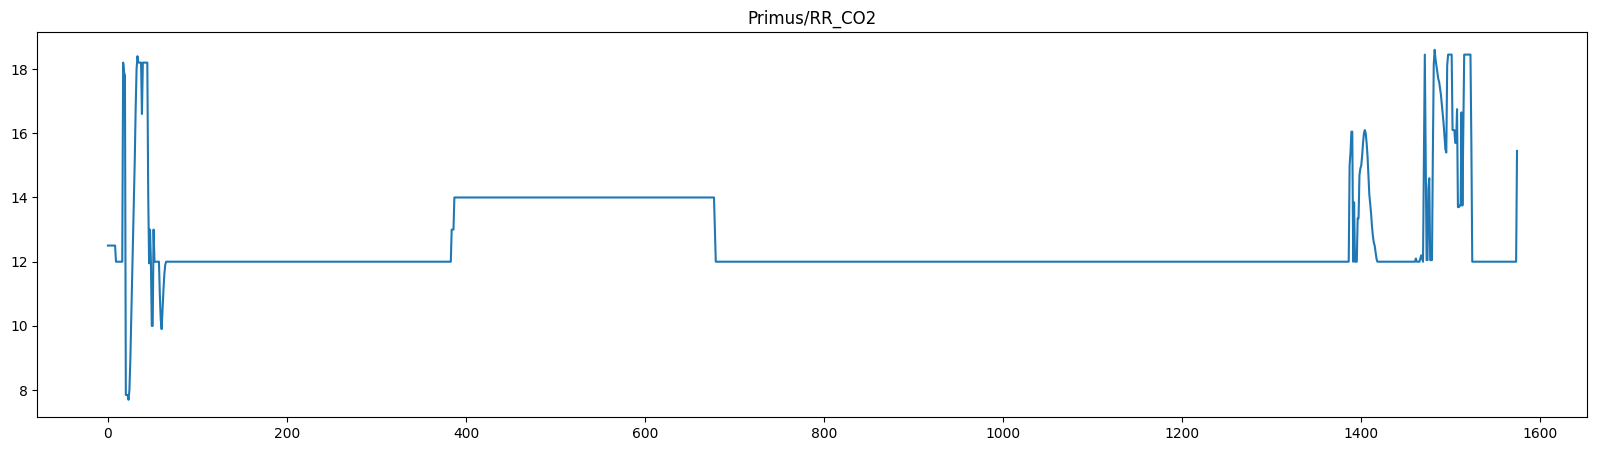

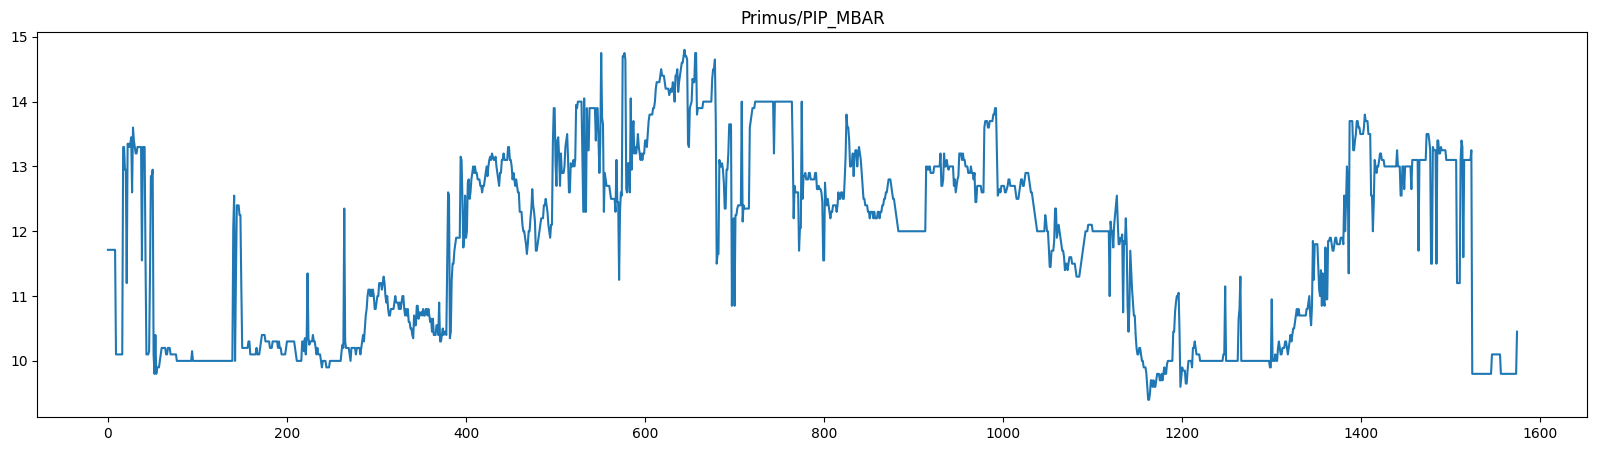

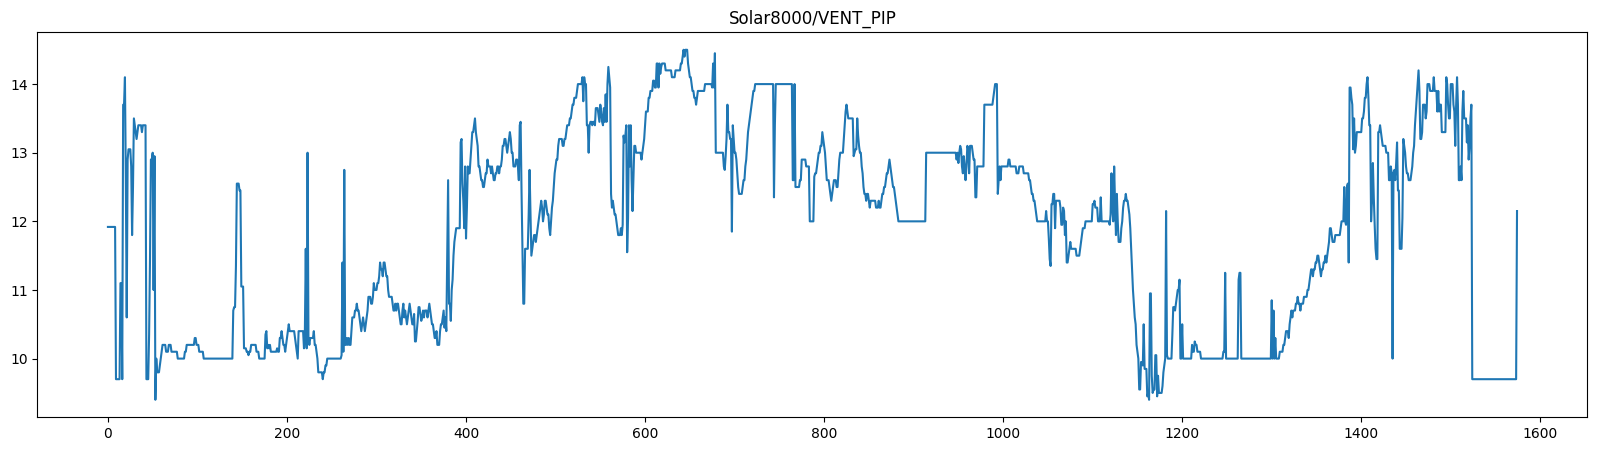

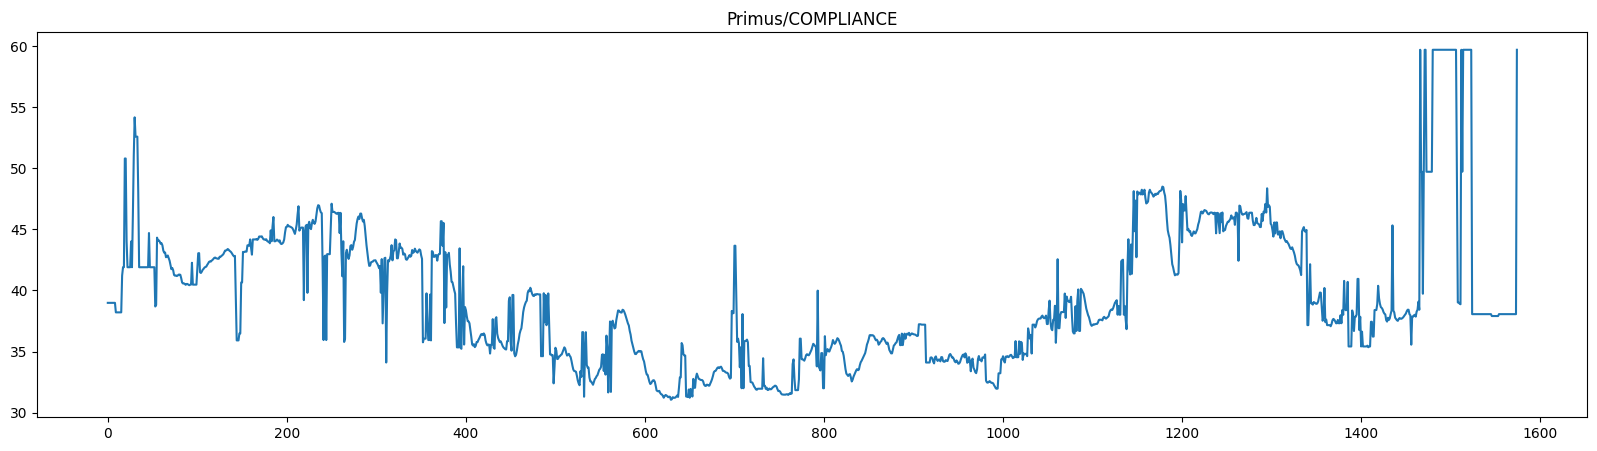

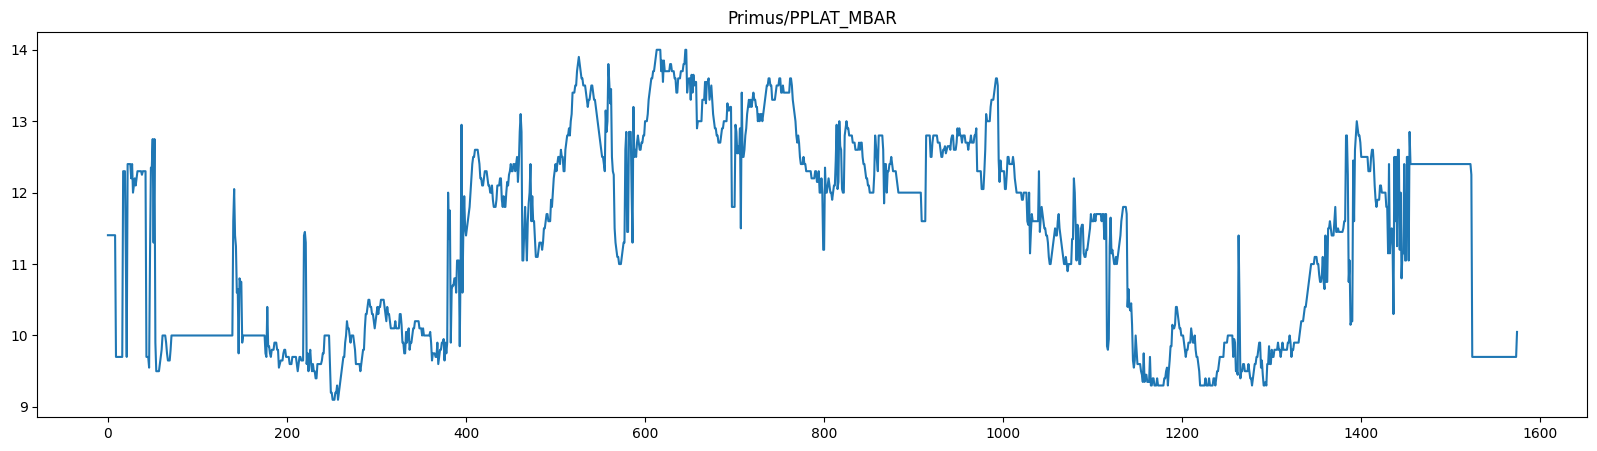

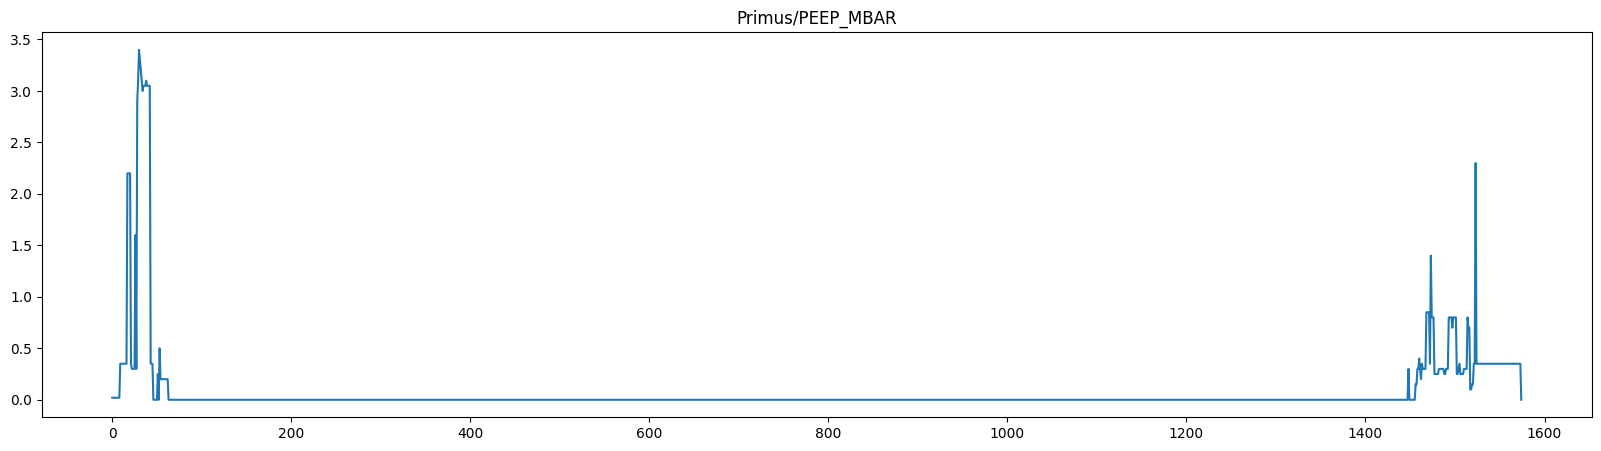

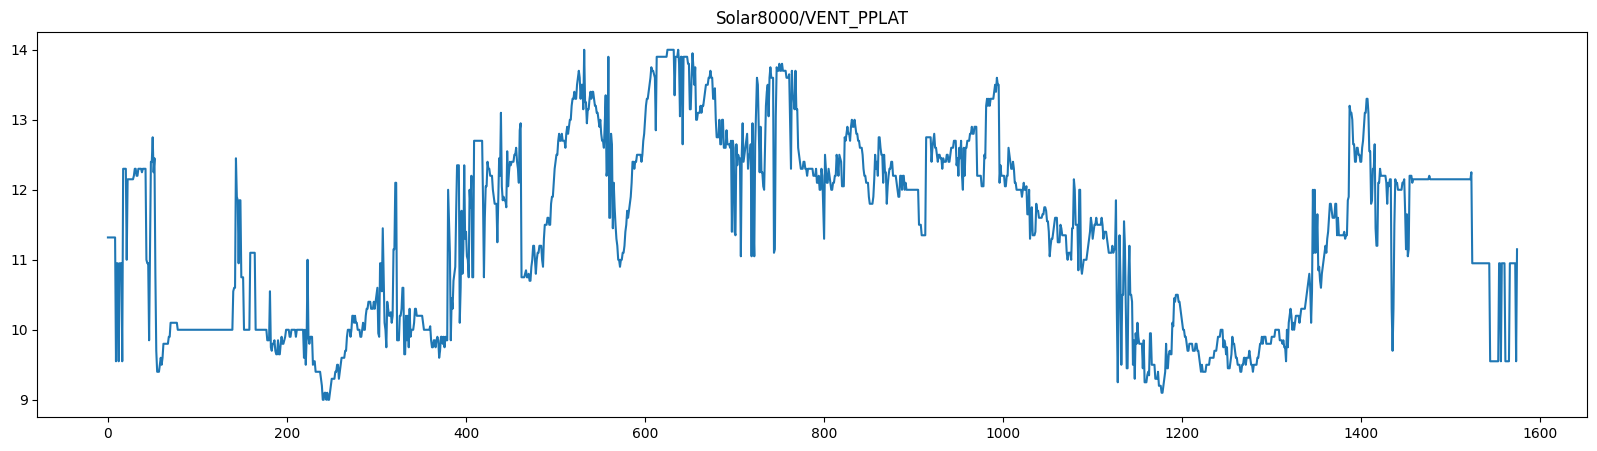

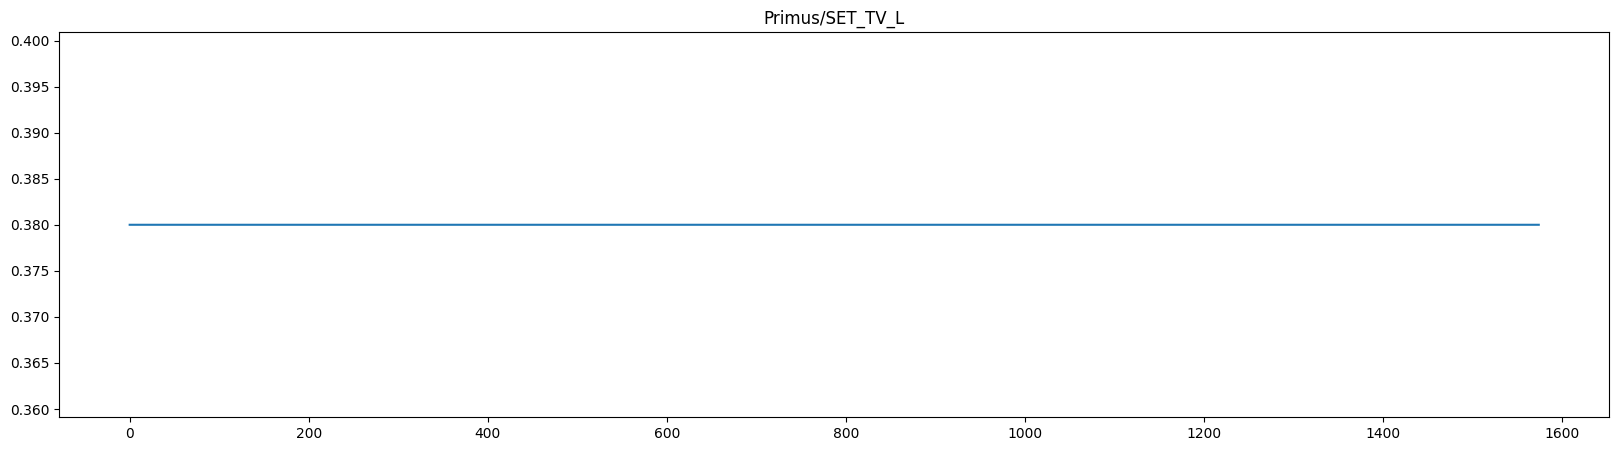

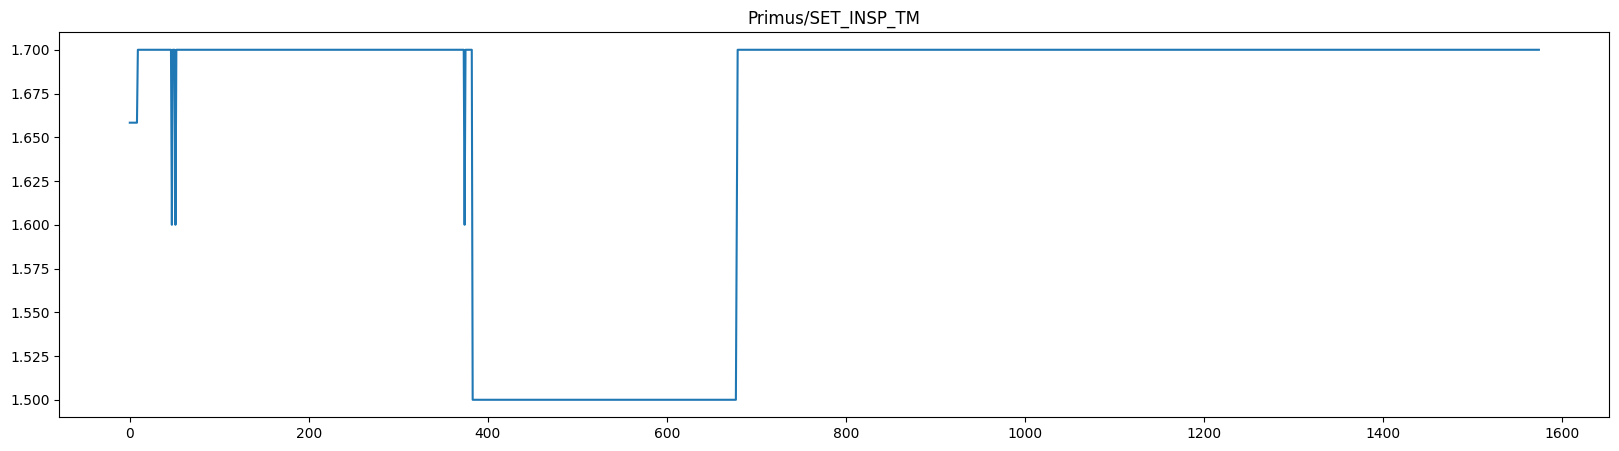

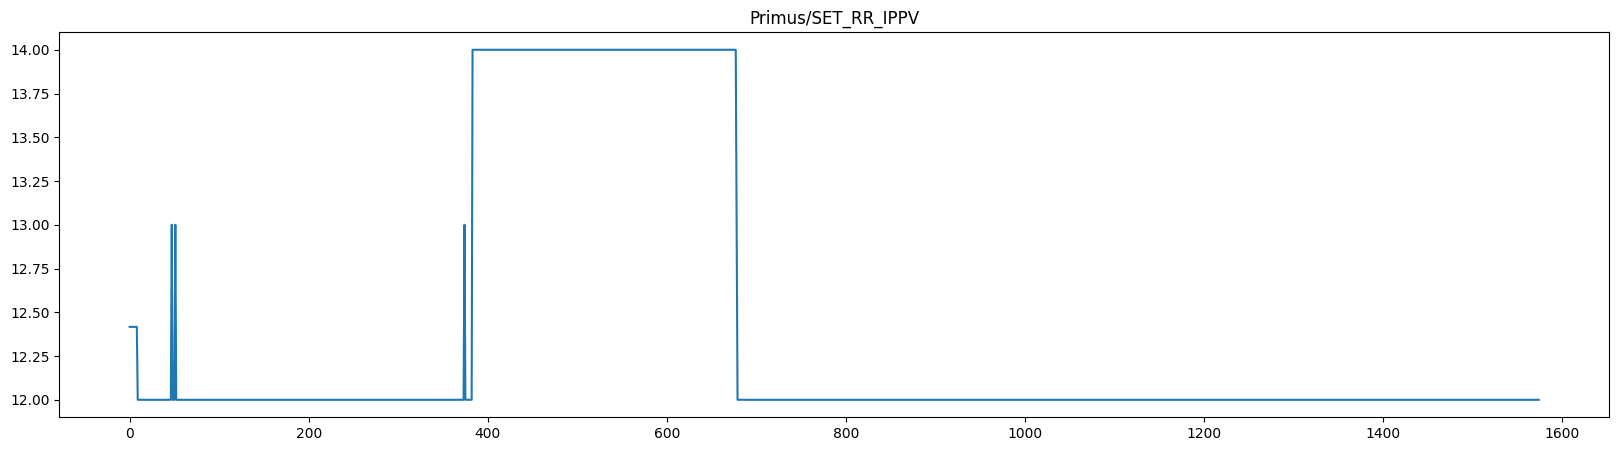

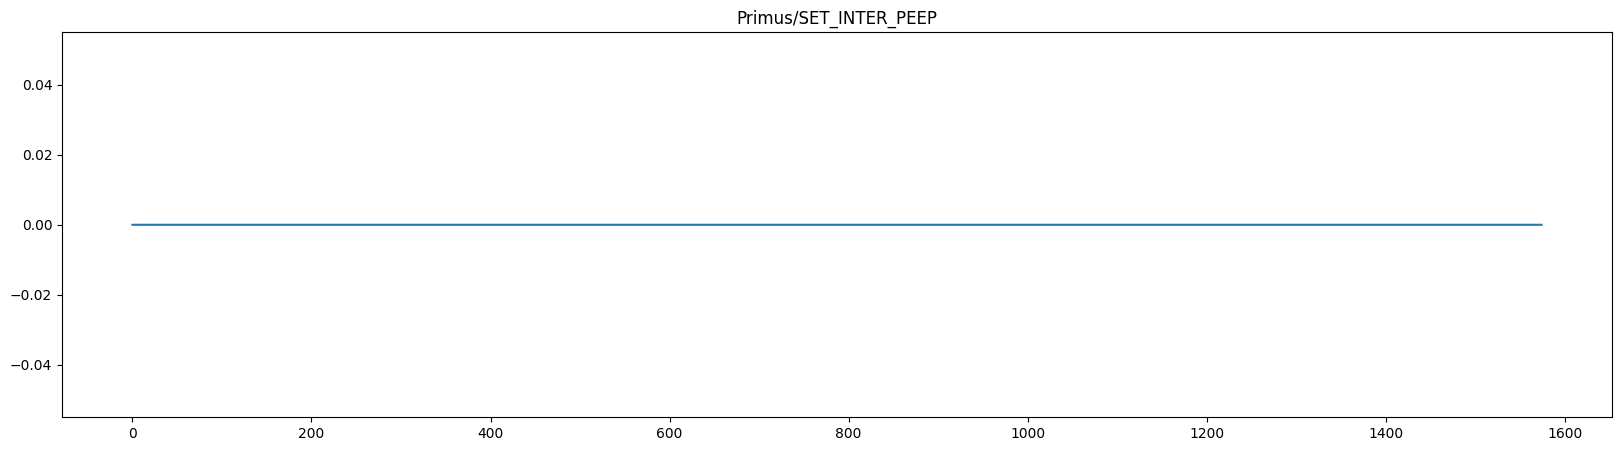

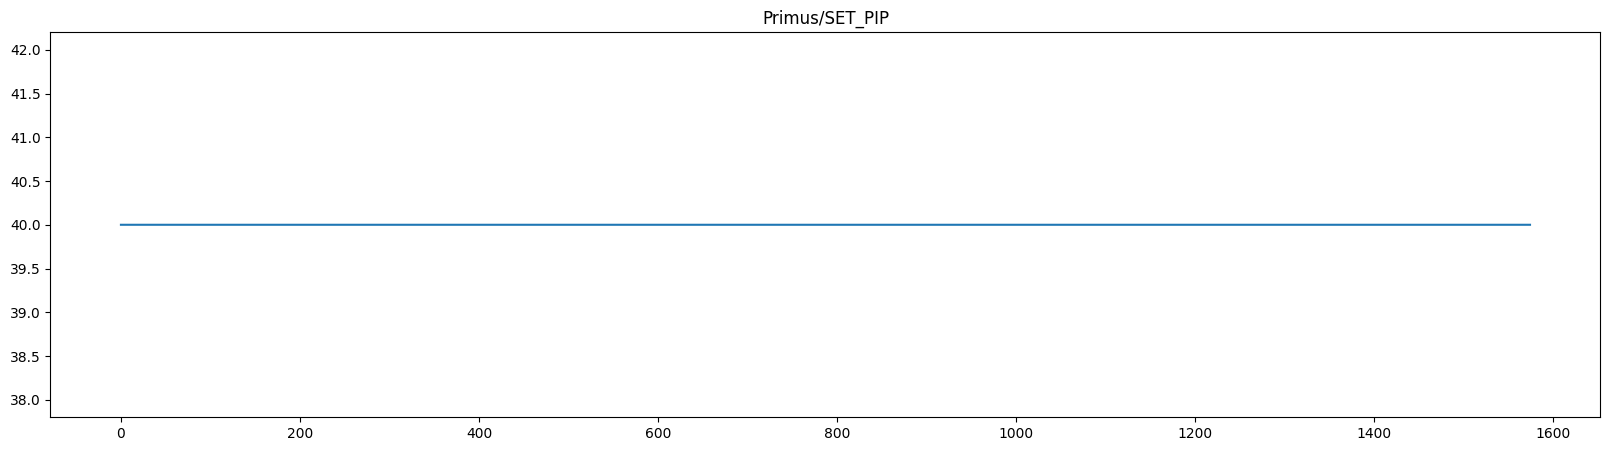

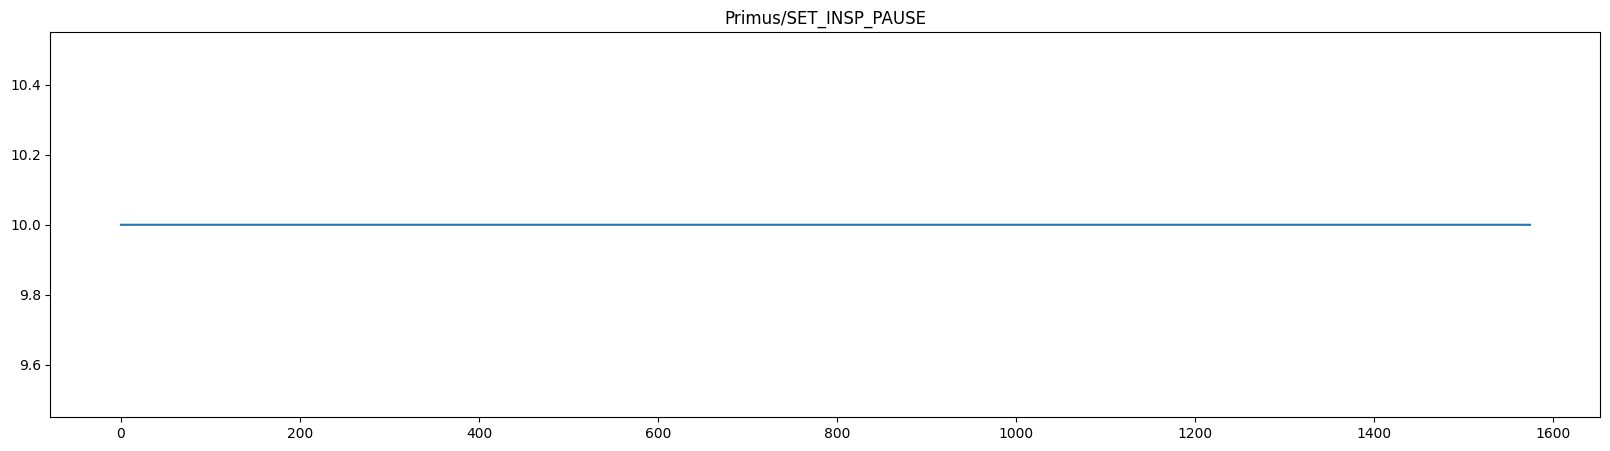

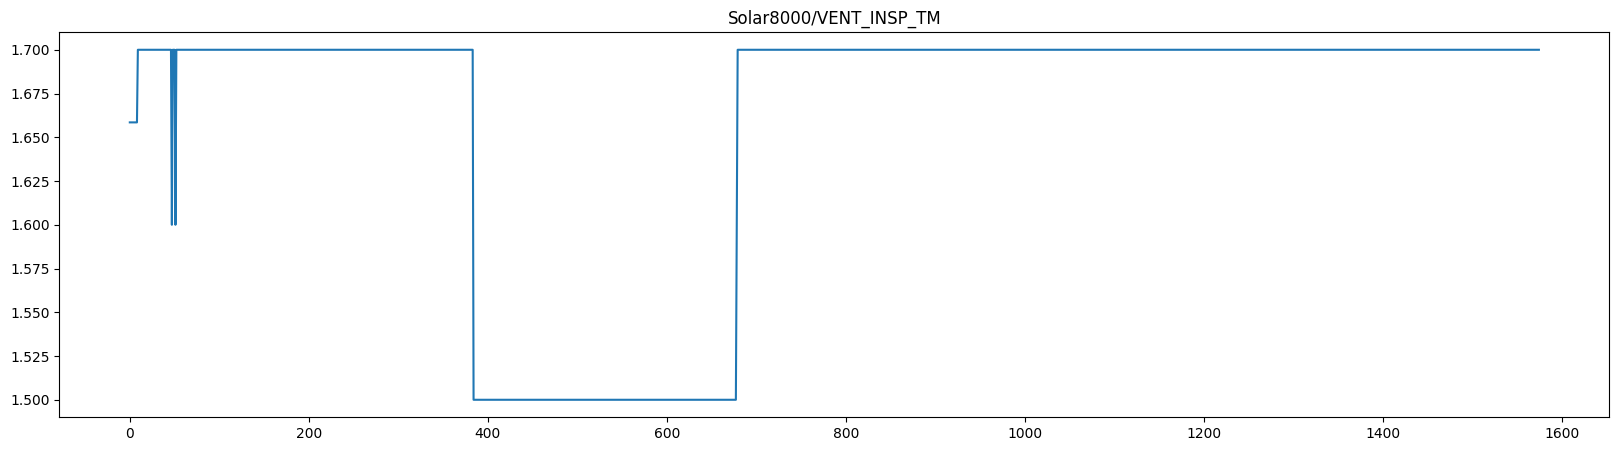

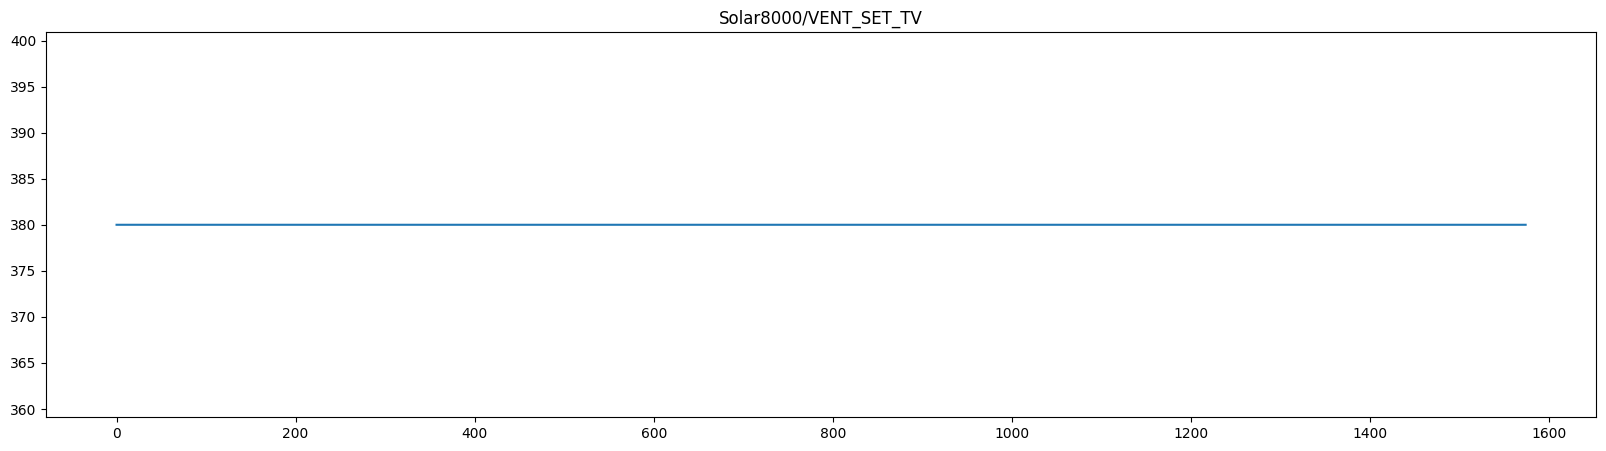

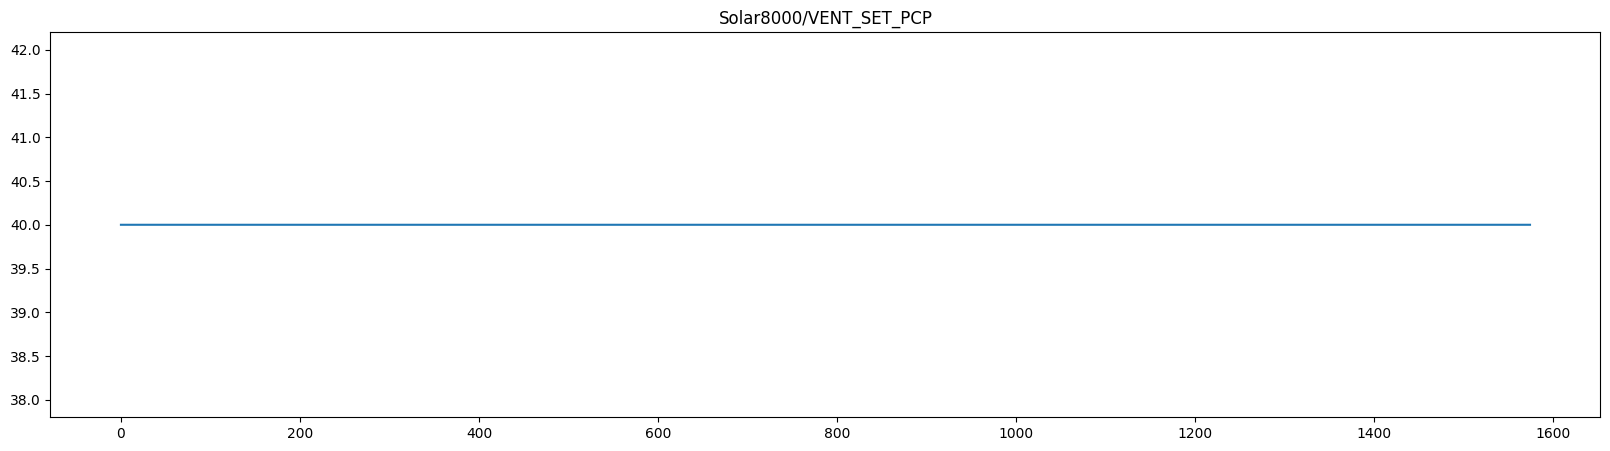

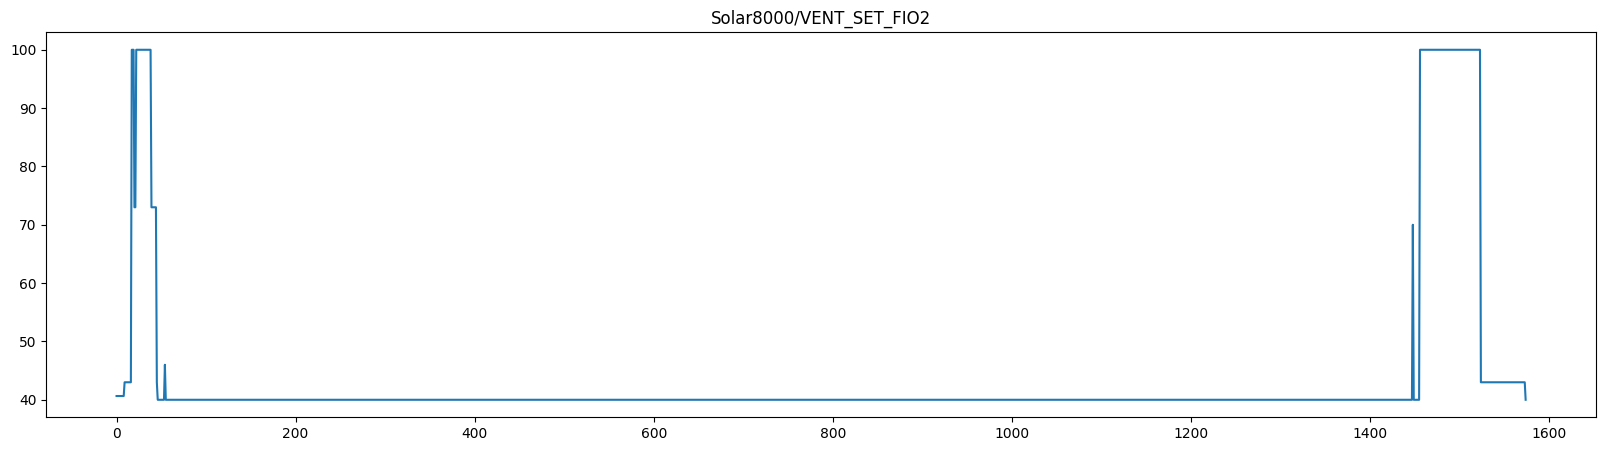

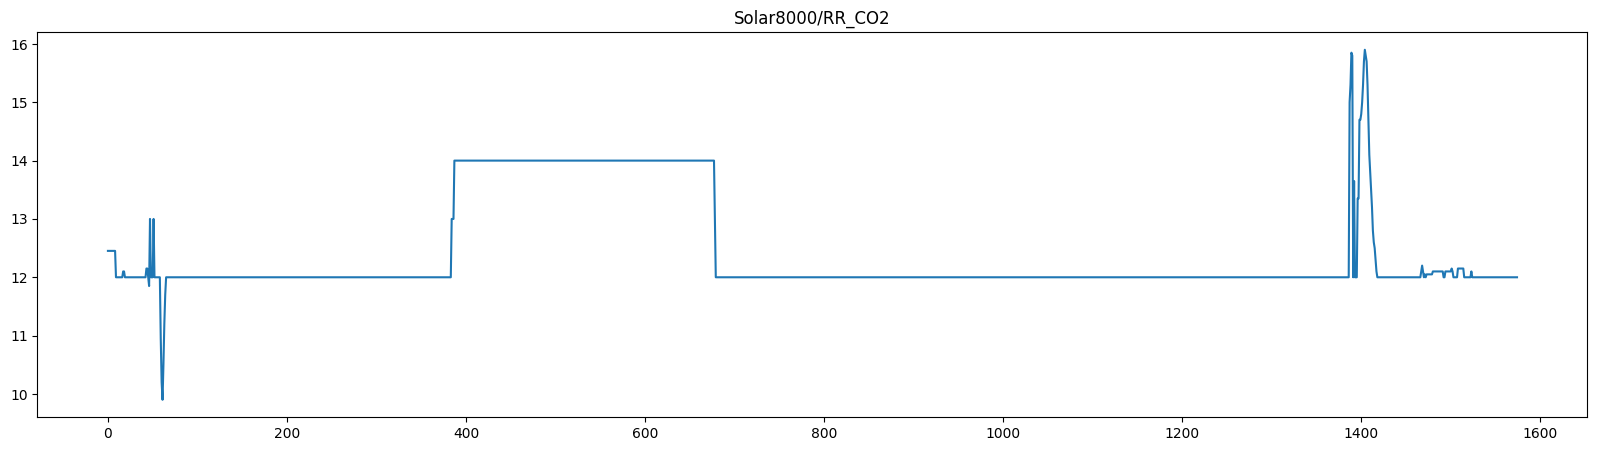

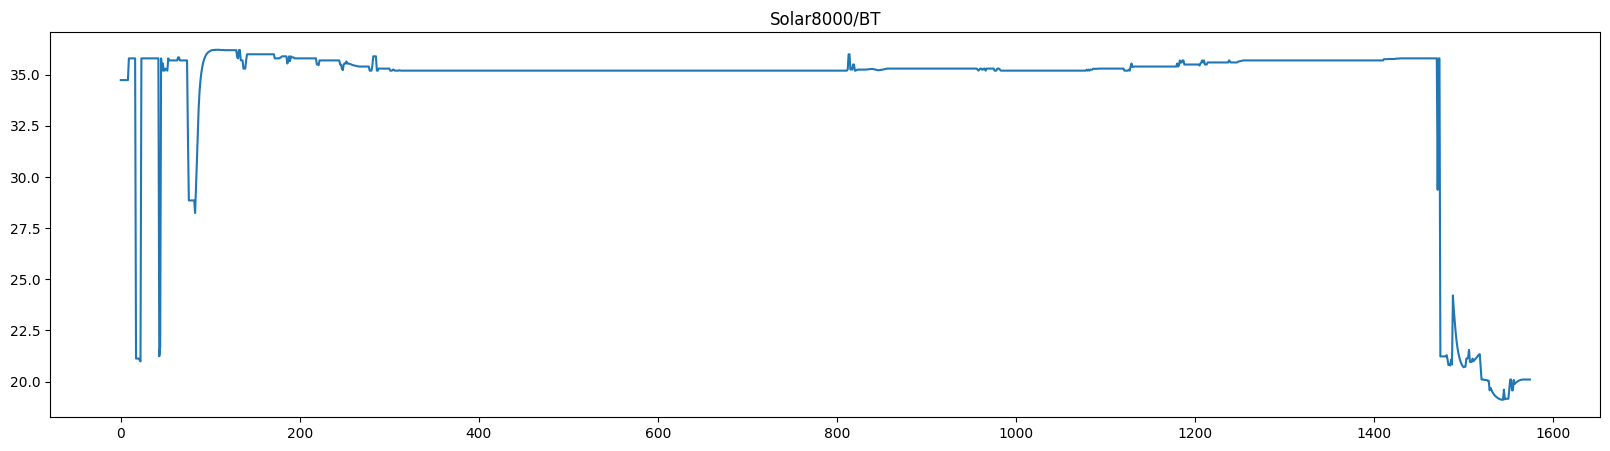

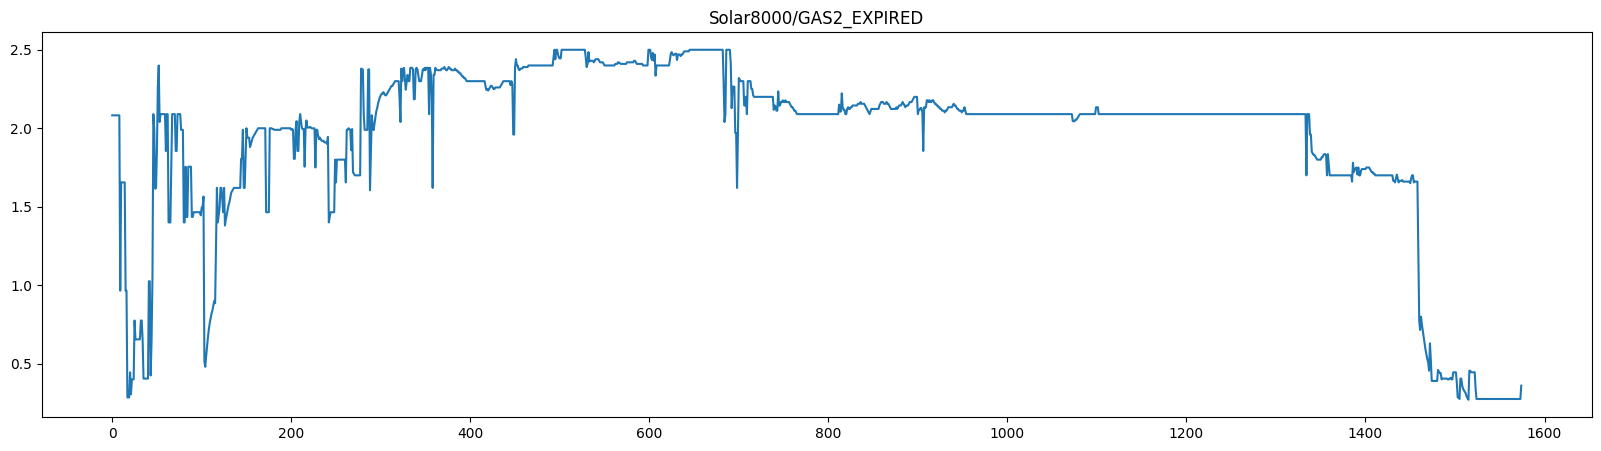

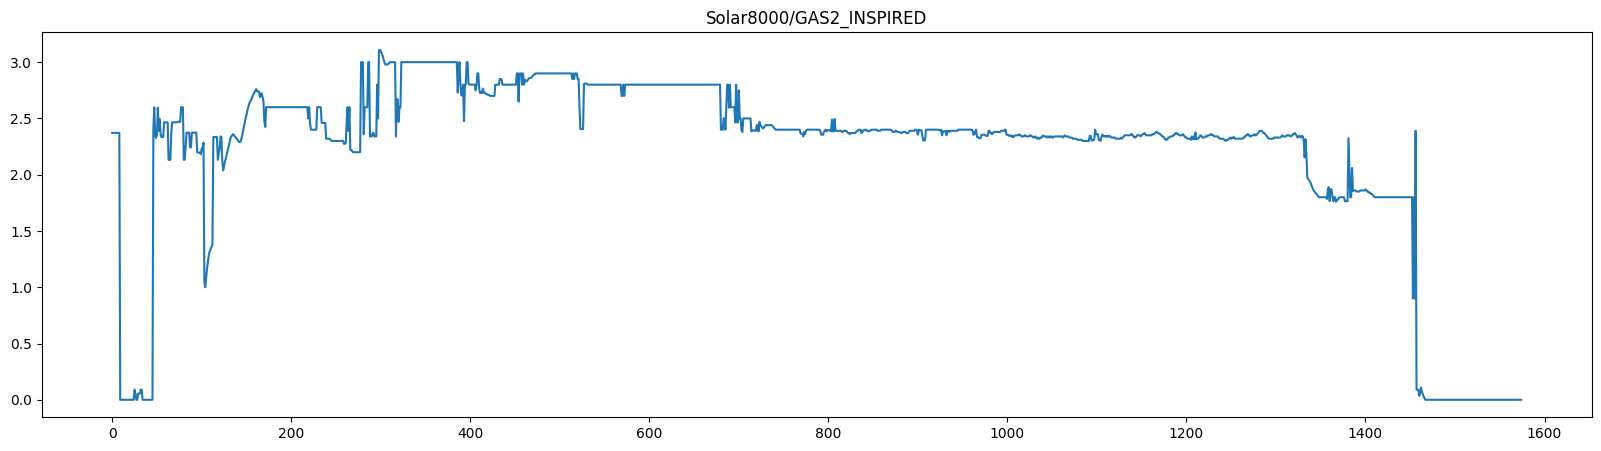

In [28]:
# полученные графики
for i in nums:
    plt.figure(figsize=(20, 5))
    plt.title(i)
    plt.plot(df[i])
    plt.show()

In [39]:
# усреднение с бОльшим окном для выявления тенденции
df_mean = df[nums].rolling(100).mean()
df_mean

Primus/CO2  Primus/AWP  BIS/EEG1_WAV  BIS/EEG2_WAV  SNUADC/ECG_II  \
0            NaN         NaN           NaN           NaN            NaN   
1            NaN         NaN           NaN           NaN            NaN   
2            NaN         NaN           NaN           NaN            NaN   
3            NaN         NaN           NaN           NaN            NaN   
4            NaN         NaN           NaN           NaN            NaN   
...          ...         ...           ...           ...            ...   
1570    10.01045     1.31390     23.520300     27.238175      -0.006395   
1571     9.72545     1.29690     23.477050     27.240475      -0.003146   
1572     9.43515     1.27990     23.481575     27.307175       0.000216   
1573     9.14915     1.10410     23.424225     27.289175       0.003514   
1574     8.99515     1.10215     23.361500     27.264775       0.006704   

      SNUADC/ECG_V5  SNUADC/PLETH   BIS/BIS   BIS/SQI  Orchestra/RFTN20_RATE  \
0               NaN           NaN       NaN       NaN                    NaN   
1               NaN           NaN       NaN       NaN                    NaN   
2               NaN           NaN       NaN       NaN                    NaN   
3               NaN           NaN       NaN       NaN                    NaN   
4               NaN           NaN       NaN       NaN                    NaN   
...             ...           ...       ...       ...                    ...   
1570      -0.040378     16.348309  32.29875  46.70435                    0.0   
1571      -0.043627     16.033903  31.64145  45.83975                    0.0   
1572      -0.046935     15.725816  31.04990  44.83975                    0.0   
1573      -0.050322     15.431752  30.45830  43.88720                    0.0   
1574      -0.053482     15.280078  29.86650  42.98210                    0.0   

      ...  Primus/SET_PIP  Primus/SET_INSP_PAUSE  Solar8000/VENT_INSP_TM  \
0     ...             NaN                    NaN                     NaN   
1     ...             NaN                    NaN                     NaN   
2     ...             NaN                    NaN                     NaN   
3     ...             NaN                    NaN                     NaN   
4     ...             NaN                    NaN                     NaN   
...   ...             ...                    ...                     ...   
1570  ...            40.0                   10.0                     1.7   
1571  ...            40.0                   10.0                     1.7   
1572  ...            40.0                   10.0                     1.7   
1573  ...            40.0                   10.0                     1.7   
1574  ...            40.0                   10.0                     1.7   

      Solar8000/VENT_SET_TV  Solar8000/VENT_SET_PCP  Solar8000/VENT_SET_FIO2  \
0                       NaN                     NaN                      NaN   
1                       NaN                     NaN                      NaN   
2                       NaN                     NaN                      NaN   
3                       NaN                     NaN                      NaN   
4                       NaN                     NaN                      NaN   
...                     ...                     ...                      ...   
1570                  380.0                    40.0                    73.21   
1571                  380.0                    40.0                    72.64   
1572                  380.0                    40.0                    72.07   
1573                  380.0                    40.0                    71.50   
1574                  380.0                    40.0                    70.90   

      Solar8000/RR_CO2  Solar8000/BT  Solar8000/GAS2_EXPIRED  \
0                  NaN           NaN                     NaN   
1                  NaN           NaN                     NaN   
2                  NaN           NaN                     NaN   
3             

In [80]:
strs

['EVENT', 'Solar8000/GAS2_AGENT']

In [81]:
# смену тенденции считаю клинически важным сигналом
df_signal = pd.DataFrame()
df_signal['EVENT'] = a_p['EVENT']
for i in nums:
    df_signal[f'{i}_to_down'] = 0
    df_signal[f'{i}_to_up'] = 0
    df_signal[f'{i}_to_down'].loc[(df_mean[i]> df_mean[i].shift(1)) & (df_mean[i]> df_mean[i].shift(-1))] = 1
    df_signal[f'{i}_to_up'].loc[(df_mean[i]< df_mean[i].shift(1)) & (df_mean[i]< df_mean[i].shift(-1))] = 1

C:\Users\KDFX Modes\AppData\Local\Temp\ipykernel_12404\1215155697.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_signal[f'{i}_to_down'].loc[(df_mean[i]> df_mean[i].shift(1)) & (df_mean[i]> df_mean[i].shift(-1))] = 1
C:\Users\KDFX Mod

In [82]:
# датасет с точками изменения тенденций графиков
df_signal

EVENT  Primus/CO2_to_down  Primus/CO2_to_up  Primus/AWP_to_down  \
0      Case started                   0                 0                   0   
1               NaN                   0                 0                   0   
2               NaN                   0                 0                   0   
3               NaN                   0                 0                   0   
4               NaN                   0                 0                   0   
...             ...                 ...               ...                 ...   
1570            NaN                   0                 0                   0   
1571            NaN                   0                 0                   0   
1572            NaN                   0                 0                   0   
1573            NaN                   0                 0                   0   
1574  Case finished                   0                 0                   0   

      Primus/AWP_to_up  BIS/EEG1_WAV_to_down  BIS/EEG1_WAV_to_up  \
0                    0                     0                   0   
1                    0                     0                   0   
2                    0                     0                   0   
3                    0                     0                   0   
4                    0                     0                   0   
...                ...                   ...                 ...   
1570                 0                     0                   0   
1571                 0                     0                   1   
1572                 0                     1                   0   
1573                 0                     0                   0   
1574                 0                     0                   0   

      BIS/EEG2_WAV_to_down  BIS/EEG2_WAV_to_up  SNUADC/ECG_II_to_down  ...  \
0                        0                   0                      0  ...   
1                        0                   0                      0  ...   
2                        0                   0                      0  ...   
3                        0                   0                      0  ...   
4                        0                   0                      0  ...   
...                    ...                 ...                    ...  ...   
1570                     0                   1                      0  ...   
1571                     0                   0                      0  ...   
1572                     1                   0                      0  ...   
1573                     0                   0                      0  ...   
1574                     0                   0                      0  ...   

      Solar8000/VENT_SET_FIO2_to_down  Solar8000/VENT_SET_FIO2_to_up  \
0                                   0                              0   
1                                   0                              0   
2                                   0                              0   
3                                   0                              0   
4                                   0                              0   
...                               ...                            ...   
1570                                0                              0   
1571                                0                              0   
1572                                0                              0   
1573                                0                              0   
1574                                0                              0   

      Solar8000/RR_CO2_to_down  Solar8000/RR_CO2_to_up  Solar8000/BT_to_down  \
0                            0                       0                     0   
1                            0                       0                     0   
2                            0                       0                     0   
3                            0                       0                     0   
4                     

<b>Вывод</b><br>
были проведены следующие действия:
- открыт один из файлов базы VitalDB
- отсечены выбросы в графиках (всё что за пределами двух стандатных отклонений от среднего в скользящем окне размером 10)
- убран шум в графиках (усреднением в скользящем окне размером 10)
- заполнены пропуски в графиках методом k-блжайших соседей
- выделены тенденции в графиках (среднее в скользящем окне размером 100) и найдены точки их перегибов
- на основании этих перегибов в датасете выделены места с вероятными жизненно важными сигналами (отмечены 1 в соответствующий столбцах)

дальнейшее развитие проекта - предсказание точек перегиба с помощью алоритмов ML и DL.